# Project: Bank Sentiment Analysis 

## Summary 
Customer Satifaction Index (CSI) for the top 4 banks in South Africa is not a true reflection of the consumers sentiment 

-> sentiment is derived by sentiment analysis of bank tweets
-> CSI is obtained by ____

### Operations
#### Twitter data
Twint to scrape tweets of the top 4 banks in South Africa \
Clean tweets with WordPunctTokenizer and Regex \
TextBlog to process sentiment of tweets 


### Project 2:
Bank outages play a large factor in the customer sentiment and overall customer satisfaction 

use:https://downdetector.co.za/



In [1]:
## Twint quick guide
'''with open("Quick Twint Code.txt","r") as f:
    contents = f.read()
    print(contents)
'''

'with open("Quick Twint Code.txt","r") as f:\n    contents = f.read()\n    print(contents)\n'

In [ ]:
import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()            #for compatibility issues with twint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import seaborn as sns


#cleaning
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords             #check this compared to world cloud 

# NLP
from textblob import TextBlob

#word cloud and stopwords
from wordcloud import WordCloud, STOPWORDS

### Configure and run Twint (twitter scrapper)

In [75]:
def twintConfig(date_from,search_string):    
    c = twint.Config()
    c.Search = search_string
    c.Pandas = True
    
    #english only
    c.Lang = "en"
    c.Since = date_from
    
    #c.Until = "2021-07-30"
    twint.run.Search(c)
    
#stdBankString = "StandardBankZA OR \"Standard Bank\""
#FNB_String = "FNBSA"

### Run twint

In [76]:
bank_search = {"FNB":"FNBSA", "StandardBank":"StandardBankZA OR \"Standard Bank\"","Nedbank":"Nedbank"}
since = "2021-09-01"

def Run_Twint(search_vals):
    
    #set empty dataframe
    Final_df= pd.DataFrame()
    
    for bank in search_vals.items():
        print ("running: "+bank[0]+"\n")
        
        #run twint
        twintConfig(since,bank[1])
        
        #get dataframe
        tweets_df = twint.storage.panda.Tweets_df
        
        #join Dataframes and create Bank name column
        tweets_df["Bank"]= bank[0]
        Final_df = pd.concat([Final_df,tweets_df])
    return Final_df

In [77]:
tweets_df = Run_Twint(bank_search)

running: FNB

1433835082326937603 2021-09-03 18:51:37 +0200 <ThembaMnguni3> Regreting  why I am banking with @FNBSA , @Nedbank has showed me so much love and support in every dream and goal that I have ever  attempted.  Trust  me @nedbank  makes a real difference.  Thank you so much. #MovingToNedbank
1433831965002768407 2021-09-03 18:39:14 +0200 <MatsobaneJalk3> @FNBSA #loveFNB..@FNBSA..the right bank in the world with low interests
1433830842309218306 2021-09-03 18:34:46 +0200 <MatsobaneJalk3> @FNBSA #lovefnb..@fnbSA..@kgole matsobane jalk..I'd 6708125610081
1433829264961515522 2021-09-03 18:28:30 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1433829137060405273 2021-09-03 18:28:00 +0200 <TrevoltaGeneral> @FNBSA Yeboo. iBank lama Bozaa #TheChangeables
1433828830385516544 2021-09-03 18:26:47 +0200 <TrevoltaGeneral> @FNBSA Safety First #FNBSafe
1433828070490791941 2021-09-03 18:23:45 +0200 <sagethevirgoan> @FNBSA kopa ewallet 😋
1433827366158098436 2021-09-03 18:20:57 +0200 <amandawilma1> @FNB

1433786172136955904 2021-09-03 15:37:16 +0200 <TLiz23> @FNBSA @phat_siiFashion Congratulations 🥳 💃💃💃
1433786015261597697 2021-09-03 15:36:39 +0200 <Mabenaldo> @FNBSA Let me tool. I leave it here.  https://t.co/SgcF6khoi9
1433785862970650628 2021-09-03 15:36:02 +0200 <BelindaMomberg> @FNBSA  #LoveFNB 💖💋💖💋💖💋💖💋
1433785557780471811 2021-09-03 15:34:50 +0200 <Ntenga3ZN> @Rbjacobs I’ve been trying to cancel @FNBSA merchant device for months, made several attempts to contact the call centre with an intention to cancel the device but no luck. Every month you’re debiting us for something we aren’t using! Scam 🚩 🚩 🚩
1433785224853430273 2021-09-03 15:33:30 +0200 <LithaneCleaning> @FNBSA Thank you, will do
1433784210578345984 2021-09-03 15:29:28 +0200 <kidwidflow> @FNBSA Saves time and money instead of standing in queues for the atm and paying more for withdrawals from the atm. #LoveFNB
1433783783023693838 2021-09-03 15:27:46 +0200 <VictorS51104114> @FNBSA #LoveFNB
1433783758692495360 2021-09-03 1

1433761732317569029 2021-09-03 14:00:09 +0200 <FNBSA> @leahmashiloane congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433761732309180444 2021-09-03 14:00:09 +0200 <FNBSA> @ZwelakheNkuna2 congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433761732284014612 2021-09-03 14:00:09 +0200 <FNBSA> @Suzey_N congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433761732275707904 2021-09-03 14:00:09 +0200 <FNBSA> @phat_siiFashion congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433761732275679234 2021-09-03 14:00:09 +0200 <FNBSA> @officialMickies congratulations! You are one step close

1433741746668720128 2021-09-03 12:40:44 +0200 <Nthabisengmg24> @FNBSA #LoveFNB
1433741684291117056 2021-09-03 12:40:29 +0200 <Nthabisengmg24> @FNBSA Helps me save because I don't get charged to withdraw at ATM.😆😊   #LoveFNB  https://t.co/BXzKoy9lty
1433741622588629021 2021-09-03 12:40:15 +0200 <Nthabisengmg24> @FNBSA Helps me save because I don't get charged to withdraw at ATM.😆   #LoveFNB  https://t.co/BXzKoy9lty
1433741487825694773 2021-09-03 12:39:42 +0200 <Nthabisengmg24> @FNBSA #LoveFNB
1433741452446740484 2021-09-03 12:39:34 +0200 <LativaMaloka> @FNBSA #LoveFNB
1433741388559101990 2021-09-03 12:39:19 +0200 <LativaMaloka> @FNBSA #LoveFNB
1433741291859423264 2021-09-03 12:38:56 +0200 <fazbucks> @FNBSA #LoveFNB
1433741111374327858 2021-09-03 12:38:13 +0200 <IamThapelo> @FNBSA No more spending in long queues at ATMs, it is cheaper to withdraw at the tills than at the ATM... Its nice because I can do shopping and when I pay withdraw money at the till. Talk about "killing" two birds wi

1433719630342860817 2021-09-03 11:12:51 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433719580996816896 2021-09-03 11:12:39 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433719544959406081 2021-09-03 11:12:31 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433719505411362816 2021-09-03 11:12:21 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433719457856303170 2021-09-03 11:12:10 +0200 <Nkosi43702239> @FNBSA @Kantar_AME #LoveFNB #BrandZSA
1433719384137142272 2021-09-03 11:11:53 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433719365950713866 2021-09-03 11:11:48 +0200 <EtsaneThelma> @FNBSA #LoveFNB
1433719343037259776 2021-09-03 11:11:43 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433719303950508032 2021-09-03 11:11:33 +0200 <EtsaneThelma> @FNBSA #LoveFNB
1433719277299896321 2021-09-03 11:11:27 +0200 <Chef_Nti> @FNBSA Business systems are important when running a business and the FNB QR speedpoint really takes businesses to the next level #LoveFNB
1433719270932951055 2021-09-03 11:11:26 +0200 <Nkosi43702239> @FNBSA #LoveFNB
1433

1433708282015797253 2021-09-03 10:27:46 +0200 <Preciou27417218> @FNBSA Firstly it keeps me and my clients safe because it's contactless payment I run a fast food business ever since my business owns a QR speed point I get new clients who loves and enjoy my business paying method #LoveFNB
1433708137467498513 2021-09-03 10:27:11 +0200 <NkosivumileDuma> @FNBSA #LoveFNB
1433707976037126154 2021-09-03 10:26:33 +0200 <ThabileSMhlungu> @FNBSA I would really like to try #LoveFNB
1433707898903875584 2021-09-03 10:26:14 +0200 <KungfuFanda1> @FNBSA #LoveFNB #TheChangeables Awesome low fee
1433707839550279684 2021-09-03 10:26:00 +0200 <HendriccahM> @FNBSA #TheChangeables  #LoveFNB
1433707702769831940 2021-09-03 10:25:27 +0200 <KholoBaloyi> @FNBSA #LoveFNB
1433707637925892100 2021-09-03 10:25:12 +0200 <ThabileSMhlungu> @FNBSA #LoveFNB
1433707586327564314 2021-09-03 10:25:00 +0200 <FNBSA> Get an FNB Aspire Credit Card. Ulindeni? Try us out from only R40 pm 🙌🙌🙌 One simple change makes a BIG differenc

1433690877835292673 2021-09-03 09:18:36 +0200 <EtsaneThelma> @FNBSA Easy Payments &amp; saves time #LoveFNB.......
1433690837121126410 2021-09-03 09:18:26 +0200 <EtsaneThelma> @FNBSA Easy Payments &amp; saves time #LoveFNB  @Lazzy70892008
1433690672645623808 2021-09-03 09:17:47 +0200 <EtsaneThelma> @FNBSA Easy Payments &amp; saves time #LoveFNB  @DaisyMolatlhegi
1433688373374373891 2021-09-03 09:08:39 +0200 <trevzngcobo> @FNBSA is really starting to frustrate me 😫😭 the bankers on the chat are not helpful at all! @Rbjacobs
1433688122466967554 2021-09-03 09:07:39 +0200 <IsayaLativa> @FNBSA #LoveFNB
1433687991231422466 2021-09-03 09:07:08 +0200 <Priscil95250943> @FNBSA I don't have to wait in long queues at the ATM. No bank charges when withdrawing at the till. I get cash while paying for my groceries #LoveFNB
1433687637068500998 2021-09-03 09:05:43 +0200 <Lesego93298467> @FNBSA 😪
1433687499516305413 2021-09-03 09:05:11 +0200 <RaganieFagmieda> @FNBSA #LoveFNB
1433687315138990080 2021-09-0

1433671436812660740 2021-09-03 08:01:21 +0200 <Leonie01221338> @FNBSA Cash@Till has helped me to save on bank charges and avoid standing in long lines and its saver  #LoveFNB
1433671026551009317 2021-09-03 07:59:43 +0200 <NkuleeHerself> @Rbjacobs Good morning hope this text finds you well. I opened an account for my daughter and ther card was suppose to be delivered yesterday instead this i what i got. What buffles me is that no one absolutely no one from CCD couriers contacted me. @FNBSA  https://t.co/9dgGVlRoPt
1433667677252464687 2021-09-03 07:46:25 +0200 <Noxolo96922143> @FNBSA needs to start prioritizing their clients, you guys cannot expect us to stand on the SASSA queue to get a statement or eWallet. Yhuuu I'm so disappointed on the Stutterheim branch
1433667671455936519 2021-09-03 07:46:23 +0200 <Akuxola_Nxusani> @Patunity23 @FNBSA Ska ba hemisa 😂😂
1433666615716065303 2021-09-03 07:42:12 +0200 <WooBack_me> @FNBSA 🚀❤ you're the best
1433663714125918223 2021-09-03 07:30:40 +0200 

1433509408642945025 2021-09-02 21:17:30 +0200 <mule012> @FNBSA #LoveFNB It convenient. No standing in long queues. No extra bank charges. It's safer, no looking over my shoulder at ATM queues. Enhanced banking technology combined with shopping experience. Easy withdrawals, no asking strangers for help at ATMs. #LoveFNB
1433508718491193347 2021-09-02 21:14:46 +0200 <amggg06> @FNBSA Earn while you spend #LoveFNB
1433508379486523393 2021-09-02 21:13:25 +0200 <TshepoM57455992> @FNBSA @Kantar_AME #LoveFNB
1433505402214391812 2021-09-02 21:01:35 +0200 <maneshg21> @FNBSA This is amazing , immediate cash instantly 👏 🙌 😍 I used it @PicknPay #LoveFNB
1433501390928809989 2021-09-02 20:45:39 +0200 <Mqhelisi_> @FNBSA It comes with the convenience of being able to shop and still be able to withdraw cash unlike when one has to first queue at the atm for money before shopping. In essence, it saves time. #LoveFNB
1433497036477829125 2021-09-02 20:28:21 +0200 <DoomySunny> @FNBSA #LoveFNB
143349692725397

1433460168239550465 2021-09-02 18:01:51 +0200 <Shalona_Reddy> @FNBSA It has made my life alot more time effective, without me having to stand in long lines to win draw money from the teller
1433459633356673031 2021-09-02 17:59:43 +0200 <KHantise> @FNBSA Kamogelo Hantise.... Mwa... I love FNB
1433458360733548548 2021-09-02 17:54:40 +0200 <NOMPUME95672955> @FNBSA The bank fees are low and very safe  #LoveFNB
1433458278307188736 2021-09-02 17:54:20 +0200 <Dima_Mawandla> @VarsityDiski @FNBSA 🔥🔥🔥  #iyachesa
1433457762248372231 2021-09-02 17:52:17 +0200 <Sindi_Mqoboli> @FNBSA why is my app slow to send notifications?
1433456068361863172 2021-09-02 17:45:33 +0200 <Nqobza60499608> @FNBSA #LoveFNB
1433455561094402057 2021-09-02 17:43:32 +0200 <Amanda032391651> @FNBSA #LoveFnb
1433454947916566529 2021-09-02 17:41:06 +0200 <Khozman03> @FNBSA #LoveFNB
1433454821642850315 2021-09-02 17:40:36 +0200 <Khozman03> @FNBSA @Glynis89549097 Congratulations 🎊🎊🎊
1433454780463173634 2021-09-02 17:40:26 +0200 <

1433418176516198407 2021-09-02 15:14:59 +0200 <Nix_indamix> Face card never declines!!😁 at least you don't have to walk around with your card when you have free access to unlimited virtual credit card on your @FNBSA app, it's safe and smart enough to change it's 3 digit CVV hourly 👌🏾 😀  https://t.co/Z7hbny3F5G #FnbAspire #TheChangeables  https://t.co/E7PeWTIOqm
1433417180574633988 2021-09-02 15:11:02 +0200 <Linkie87280968> @FNBSA Helps to reduce my banking fees. #LoveFNB
1433416514435178497 2021-09-02 15:08:23 +0200 <Amanda032391651> @FNBSA #LoveFnb
1433416028298620938 2021-09-02 15:06:27 +0200 <yamkelampini> @FNBSA #LoveFNB
1433415940838858756 2021-09-02 15:06:06 +0200 <yamkelampini> @FNBSA #LoveFNB
1433415805195198464 2021-09-02 15:05:34 +0200 <ElethuiBongo> @FNBSA #LoveFNB
1433415742351941632 2021-09-02 15:05:19 +0200 <og_papi> @FNBSA #LoveFNB
1433415415674425344 2021-09-02 15:04:01 +0200 <W00dy78> 4/4 @WesBank_Support @FNBSA great....news update there is no natis document attached.

1433397281844305922 2021-09-02 13:51:57 +0200 <hope_moteane> @FNBSA It has helped me to be more cautious with my spending habits. To stick to my needs thn wants. To be a person tht want to knw whr each each n every cent went #LoveFNB  https://t.co/ScBPBUbq38
1433396685066149900 2021-09-02 13:49:35 +0200 <Nakkiran> @FNBSA .@Rbjacobs Fours hours now since I tried to do the banking I need, and still unable to do so.  @FNBSA's world-class banking...
1433395876865658880 2021-09-02 13:46:22 +0200 <mirage_mimii> @FNBSA Hi @FNBSA , I have a query regarding your Connect deals. @Rbjacobs is not entertaining my query. 🥺
1433395402976411656 2021-09-02 13:44:29 +0200 <DaisyMolatlhegi> @FNBSA #LoveFNB
1433393908235522054 2021-09-02 13:38:33 +0200 <NZulakh> @FNBSA I think FNB workers are on strike or working at home is the cause of poor service
1433393552785018886 2021-09-02 13:37:08 +0200 <OmegaRu69148116> @FNBSA #LoveFNB
1433393416176558085 2021-09-02 13:36:36 +0200 <Oriel97195603> @FNBSA It saved 

1433378238164873216 2021-09-02 12:36:17 +0200 <PillaiRachael> @FNBSA #LoveFNB
1433376509474086916 2021-09-02 12:29:25 +0200 <LeeAnnStylish> @FNBSA #LoveFNB #TheChangeables Help simply means to make it easier for someone to do something when you offer service
1433375827455000578 2021-09-02 12:26:42 +0200 <Tatum57572781> @OUTASA @BusinessTechSA I’ve been in the line at home affairs for 3hours. I booked and paid online hoping to get a bank slot. Nothing. @FNBSA …they tell you to go to Home Affairs. It’s a debacle!!
1433375657787105282 2021-09-02 12:26:02 +0200 <sipho63> The @FNBSA in Sandton is offline please tell us when it’s back online iyooo haai phela
1433375368749125632 2021-09-02 12:24:53 +0200 <Portia86764718> @FNBSA #LoveFNB
1433375011071537154 2021-09-02 12:23:28 +0200 <Nthabis85361799> @FNBSA Can a good Samaritan donate electricity and food for me. My son is in hospital i dont see him everyday because i can't afford to
1433374484531224577 2021-09-02 12:21:22 +0200 <ZoeMsutwana> 

1433361375687057410 2021-09-02 11:29:17 +0200 <Nelisiwekhoza8> @FNBSA #LoveFNB
1433361227464548352 2021-09-02 11:28:41 +0200 <Nakkiran> .@FNBSA being particularly useless today. Being shifted pillar to post, over 2 hours on the phone, and no one can sort a simple issue... #epicfail
1433361198859362305 2021-09-02 11:28:35 +0200 <MpahlweN> @FNBSA #LoveFNB
1433361198754541572 2021-09-02 11:28:35 +0200 <EdrichVenter> level of incompetence of @FNBSA staff is next level! Wow!
1433361143981031424 2021-09-02 11:28:21 +0200 <MpahlweN> @FNBSA #LoveFNB
1433361066248085513 2021-09-02 11:28:03 +0200 <KungfuFanda1> @FNBSA #LoveFnb
1433360990414979074 2021-09-02 11:27:45 +0200 <Simon45389510> @FNBSA #LoveFNB
1433360883116302337 2021-09-02 11:27:19 +0200 <LesibaSebuenya1> @FNBSA #LoveFNB
1433360400335114243 2021-09-02 11:25:24 +0200 <FNBSA> "First National Bank has again outperformed its rivals by recording a brand value of $2.7bn in the fourth Kantar BrandZ ranking of SA’s most valuable brands."  Cli

1433337471098572802 2021-09-02 09:54:17 +0200 <MsingoMATIMBA> @FNBSA It decrease chances of spreading and increasing of effection of COVID-19 as there's no lines of withdrawal at tills #LoveFNB
1433337363590172676 2021-09-02 09:53:52 +0200 <Mahloromela_MI> @FNBSA #LoveFNB
1433336222869561348 2021-09-02 09:49:20 +0200 <ComforterThrow> @FNBSA I was selling my previous car it helped me to get the instant car value estimated to ensure I don't sell my car for peanuts #LoveFNB FNB app nav&gt;car is the best
1433335840361664513 2021-09-02 09:47:49 +0200 <Mama_Ontetlile> @FNBSA I used it to view car deals 🤭 #LoveFNB
1433335525457420293 2021-09-02 09:46:34 +0200 <khule19> #26to21 was the final score in the 1st test in 2009! Tell us what you think the final score was for the 1st test won by SA in the 2009 Lions Series 🏉 𝗧𝗔𝗣 𝗕𝗘𝗟𝗢𝗪 👇 &amp; you could 𝗪𝗜𝗡 a SIGNED British &amp; Irish Lions jersey with @FNBSA #FNBLovesRugby
1433334839982317571 2021-09-02 09:43:50 +0200 <KeabetsweMoroke> @FNBSA #LoveF

1433324918993825797 2021-09-02 09:04:25 +0200 <SuzanLovedonia> @FNBSA Saves time❤️ #LoveFNB
1433324888031440896 2021-09-02 09:04:17 +0200 <amggg06> @FNBSA So much convenience, no need to travel to go renew my license disk or pay fines, it's right here on my FNB Banking App #LoveFNB
1433324887452512262 2021-09-02 09:04:17 +0200 <Syabonga_Qwabe> @FNBSA @FNBSA Someone is helping himself/herself on my account by taking R50s everytime there is money on the account. As usual when you try to report cases at FNB it's always at your expense. A consulted put me on hold for 30 minutes and dissappear
1433324878271328257 2021-09-02 09:04:15 +0200 <TLiz23> @FNBSA It has helped me avoid long queues at the post office and traffic department #LoveFNB
1433324835137019906 2021-09-02 09:04:05 +0200 <Khutso09095714> @FNBSA I love it ❤❤ #LoveFNB
1433324764471377926 2021-09-02 09:03:48 +0200 <iamkontagious> @FNBSA It has helped me to track all my cash spending. Manage my personal budgets. has created a healt

1433303978935267330 2021-09-02 07:41:12 +0200 <PertuniaNgoman1> @FNBSA @Kantar_AME #LoveFNB
1433303561509773314 2021-09-02 07:39:33 +0200 <MyOphinyon> @FNBSA is the only bank has looked after me since I was a student. Only 1thing left now🤗🤞..  To help me with that debt esingapheli. Ngiyafa akuphupheki nakahle yiso.. Awuu bakithi ngizamen as ur loyal customer  https://t.co/TVrcKSNQHE
1433301947210153984 2021-09-02 07:33:08 +0200 <LaurenceMathe1> @FNBSA #Lovefnb
1433301728619806721 2021-09-02 07:32:16 +0200 <Littleroc02> @FNBSA @Kantar_AME Congratulations 💙 #LoveFNB
1433301716754214913 2021-09-02 07:32:13 +0200 <DryGudani> @FNBSA My New roof because my banana roof is old fashioned  #LoveFNB
1433300582228447232 2021-09-02 07:27:42 +0200 <Nthabisengmg24> @FNBSA Great #LoveFNB
1433300451496239104 2021-09-02 07:27:11 +0200 <Nthabisengmg24> @FNBSA @Kantar_AME Congratulations 👏 ,#LoveFNB
1433300241218953220 2021-09-02 07:26:21 +0200 <Nthabisengmg24> @karinduchenne @FNBSA @Kantar_AME @Kantar We

1433171219390550021 2021-09-01 22:53:40 +0200 <terencematera> @FNBSA I save on atm withdrawal costs plus I get everything @till #LoveFNB
1433167002386927616 2021-09-01 22:36:54 +0200 <RMadiba> Why is @FNBSA still feel the need to charge us over 40 Rands for "pay and clear now" to other bank accounts, are you punishing your customers for people having not interested to use FNB ? 💁🏿‍♂️
1433165951919345677 2021-09-01 22:32:44 +0200 <TshepoM57455992> @FNBSA @Kantar_AME #LoveFNB
1433163195259277315 2021-09-01 22:21:47 +0200 <igermanking> @betway your @FNBSA E-Wallet takes 72 hours, can't you make it one hour at least, asseblief tog 🙏🏾🙏🏾🙏🏾
1433163135221907459 2021-09-01 22:21:32 +0200 <sthehpearlzulu> @FNBSA please send a link for your new jobs posted from careers .
1433161914947932163 2021-09-01 22:16:42 +0200 <SuzanLovedonia> @FNBSA It helps me to save more 💰because is FREE of bank fees. #LoveFNB
1433160994382127108 2021-09-01 22:13:02 +0200 <herchantal332> @FNBSA #LoveFNB
1433160644329627

1433128431110209536 2021-09-01 20:03:38 +0200 <ElethuiBongo> @FNBSA #LoveFNB
1433128237048242188 2021-09-01 20:02:52 +0200 <MBE50288854> @FNBSA So, so convenient.. No lines and you do it while you are at the till. #LoveFNB
1433127960752558091 2021-09-01 20:01:46 +0200 <ronaldn70> @FNBSA, can you please add a functionality that users can respond to your license renewal notications, either if they dont want to use your services or have opted to use other means.
1433125553352105988 2021-09-01 19:52:12 +0200 <theeTebu> @FNBSA new black cards are so ugly, why did u have to change them ☹️
1433125359600513026 2021-09-01 19:51:26 +0200 <engeneer_wealth> lets close this: @FNBSA , @StandardBankZA , @Nedbank are #capitec clients banned from withdrwing from your ATMs? Please balance me since i use all the above mentioned banks
1433125318697570307 2021-09-01 19:51:16 +0200 <KhangelaniTsha1> @FNBSA Not FNB I know
1433123207670898693 2021-09-01 19:42:53 +0200 <DionSamuel1> @Naicker_94 @FNBSA I can sy

1433086444847894542 2021-09-01 17:16:48 +0200 <SenzoNgwaqa> I'm depressed, we've done 28% of the work thus far on a million rand project, from what we had saved, borrowed from friends and family. Even with 30 day invoices going in our bank @FNBSA is incapable to helping out. The list of business funding structures approached is endless.
1433085551586992132 2021-09-01 17:13:15 +0200 <Refilwepitso6> @FNBSA #LoveFNB
1433085153597968388 2021-09-01 17:11:40 +0200 <Voovavoom> @FNBSA #LoveFNB
1433085107397595141 2021-09-01 17:11:29 +0200 <Voovavoom> @FNBSA #LoveFNB
1433085019225038857 2021-09-01 17:11:08 +0200 <Sibahle_M24> @FNBSA because the service I got is sickening! How do u make some1 wait for so long? It’s either you can help or not? So I can see if another bank can help me
1433084278213160960 2021-09-01 17:08:12 +0200 <Sibahle_M24> @FNBSA to call me back..and to this day no1 hasn’t bothered to call back!! I went to Clearwater last week Friday, constantia Monday, Braam Tues(they were of

1433062141817495552 2021-09-01 15:40:14 +0200 <R_Filwe1> @FNBSA Its helpful because I no longer have to queue and ATMs and there are no bank charges #LoveFNB
1433062005460684802 2021-09-01 15:39:41 +0200 <Agm_vessel> @FNBSA Small fees compared to ATM #LoveFNB
1433061204893765636 2021-09-01 15:36:30 +0200 <Mr_LMatlou> @FNBSA on the 7/08/2021 I did a refund at a store, to my @standardbank account,but the money is still not reflecting in my account, iv got the recipe of the transaction being successful, merchant gave me paperwork to show the money was reversed, please help.
1433059895339855874 2021-09-01 15:31:18 +0200 <SuzzieMN> @FNBSA By saving every time I withdraw cash because it's free, and saving me from long ATM queues. #LoveFNB
1433059268232683520 2021-09-01 15:28:49 +0200 <zamathusini6> @FNBSA It helps alot at months end shopping I have 3 kids so I cant be stuck in long ATM que to withdraw money. Getting my groceries and money in one place is all the convinience I need #LoveFNB
1

1433036965830594561 2021-09-01 14:00:11 +0200 <FNBSA> @VanishreePilla1 congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433036965818028037 2021-09-01 14:00:11 +0200 <FNBSA> @_am_godschild congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433036965813817350 2021-09-01 14:00:11 +0200 <FNBSA> @HitKillerJokes congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433036965809737730 2021-09-01 14:00:11 +0200 <FNBSA> @smarc_p congratulations! You are one step closer to winning a voucher. 😀 Please DM us on @FNBSA with your full name and ID number. 🙌  Ts &amp; Cs apply. #LoveFNB
1433036965809696775 2021-09-01 14:00:11 +0200 <FNBSA> @TheQueen3976698 congratulations! You are one step closer

1433020308898861057 2021-09-01 12:54:00 +0200 <KeanenC18> @FNBSA @Kantar_AME #LoveFNB #BrandZSA
1433020140803796992 2021-09-01 12:53:20 +0200 <KeanenC18> @Kantar_AME @Kantar @FNBSA #LoveFNB
1433020099074666501 2021-09-01 12:53:10 +0200 <MakuaMapule> @FNBSA Cash@Till has helped me when I needed money urgently to pay for my taxi fare  #LoveFNB
1433020035107336192 2021-09-01 12:52:55 +0200 <KeanenC18> @karinduchenne @FNBSA @Kantar_AME @Kantar #LoveFNB
1433019974990303235 2021-09-01 12:52:40 +0200 <TroddAwesome> Is @FNBSA down today? Kunini though
1433019919466176512 2021-09-01 12:52:27 +0200 <Hm9Safe> @Kantar_AME @Kantar @FNBSA #LoveFNB
1433019610228477957 2021-09-01 12:51:13 +0200 <MondliBrianZum1> @c_yar1 @RulzKay1_ @FNBSA Ku rich abanyeke manje 😂😂😂
1433019452174516224 2021-09-01 12:50:36 +0200 <zero_ZZ1926> @c_yar1 @FNBSA I think you are not safe Siya, I can be ur VIP security  https://t.co/XnEPz5RDPV
1433019430129315846 2021-09-01 12:50:31 +0200 <Firstwaver_art> @FNBSA inbox messages 

1433010878283239427 2021-09-01 12:16:32 +0200 <bathandwayo> @FNBSA #LoveFNB  It’s super convenient and easy
1433010830728126477 2021-09-01 12:16:20 +0200 <VellyMoagi> @FNBSA It saves me time because I do my shopping and withdrawal at the same time and I also love the fact that it's free of charge #LoveFNB
1433010731558084610 2021-09-01 12:15:57 +0200 <Amukels> @karinduchenne @FNBSA @Kantar_AME @Kantar I felt that way the past 5 hours. The horrible customer service has changed my mind. I can't wait to switch
1433010640428351491 2021-09-01 12:15:35 +0200 <MeRC_Mane> @c_yar1 @FNBSA 🤣 😂 🤣
1433010375415435272 2021-09-01 12:14:32 +0200 <SeipatiBopape> @c_yar1 @FNBSA We offer bouncer services @bouncerservice if you ever feel like you need protection 😋
1433010173233270787 2021-09-01 12:13:43 +0200 <DryGudani> @FNBSA #LoveFNB  CashTill® has help me not carrying my cash because is not safe and make there is no charge in the till.
1433010089758183426 2021-09-01 12:13:24 +0200 <Iamtiaantjie> @FNBS

1432998200294641667 2021-09-01 11:26:09 +0200 <IsayaLativa> @FNBSA @Kantar_AME #LoveFNB
1432998197681664003 2021-09-01 11:26:08 +0200 <Shathe4> @FNBSA #LoveFNB
1432998145416380417 2021-09-01 11:25:56 +0200 <Shathe4> @FNBSA @Kantar_AME ❤❤❤❤😎 much love #LoveFNB
1432998032417636353 2021-09-01 11:25:29 +0200 <Amon_Mali> @FNBSA #LoveFNB
1432997959206117376 2021-09-01 11:25:11 +0200 <Amon_Mali> @FNBSA @Kantar_AME #LoveFNB
1432997486482927617 2021-09-01 11:23:19 +0200 <tloroks> @FNBSA @Kantar_AME #LoveFNB
1432997427804614657 2021-09-01 11:23:05 +0200 <tloroks> @FNBSA #LoveFNB
1432997162661593090 2021-09-01 11:22:02 +0200 <sholo123> @FNBSA #LoveFNB
1432997114305449984 2021-09-01 11:21:50 +0200 <PButthelezi> @FNBSA @Kantar_AME #LoveFNB
1432997104092336129 2021-09-01 11:21:48 +0200 <PrinceBaTumi> @c_yar1 @FNBSA You are the boss
1432997093547851778 2021-09-01 11:21:45 +0200 <sholo123> @FNBSA #LoveFNB
1432997070303072261 2021-09-01 11:21:40 +0200 <MphoCathrine7> @FNBSA #LoveFNB
1432997028133490698

1432993387616034822 2021-09-01 11:07:01 +0200 <Mahloromela_MI> @FNBSA Im avoiding withdrawal charges at ATMs and long queues  I save lots of money with Cash@Till  #LoveFNB
1432993384642252801 2021-09-01 11:07:01 +0200 <hope_moteane> @FNBSA @Kantar_AME #LoveFNB
1432993377428152320 2021-09-01 11:06:59 +0200 <MACASSER> @FNBSA I was one person who would withdraw cash to ATMs but i then realized that is was costing me too much in fees. I started doing my withdrawals at Checkers when i do grocery shopping and it has been sooo convenient for me. No costs at all. #LoveFNB
1432993367521206273 2021-09-01 11:06:57 +0200 <KholoBaloyi> @FNBSA @Kantar_AME #LoveFNB #BrandZSA
1432993351725375492 2021-09-01 11:06:53 +0200 <SueAnn73819637> @FNBSA #LoveFNB
1432993320431665152 2021-09-01 11:06:45 +0200 <TshepoM61158154> @FNBSA @Kantar_AME #LoveFNB
1432993311745261584 2021-09-01 11:06:43 +0200 <SueAnn73819637> @FNBSA @tendanilidovho #LoveFNB
1432993250852458498 2021-09-01 11:06:29 +0200 <FNBSA> We are trul

1432987108986269696 2021-09-01 10:42:05 +0200 <IsaacNkuna17> @FNBSA #LoveFNB
1432987032666714112 2021-09-01 10:41:46 +0200 <IsaacNkuna17> @FNBSA #LoveFNB
1432987016174706692 2021-09-01 10:41:42 +0200 <KethyMahlako> @FNBSA It is cheaper to withdraw money at tills #LoveFNB
1432986928878653446 2021-09-01 10:41:22 +0200 <Natalie_007_> No more long queues just life made simple with @FNBSA Cash till option 😃 #LoveFNB @FNBSA
1432986928652095491 2021-09-01 10:41:22 +0200 <IsaacNkuna17> @FNBSA I save from bank charges #LoveFNB
1432986902844657664 2021-09-01 10:41:15 +0200 <Natalie_007_> @FNBSA No more long queues just life made simple with @FNBSA Cash till option 😃 #LoveFNB @RicadoMorne
1432986862826790915 2021-09-01 10:41:06 +0200 <Natalie_007_> @FNBSA No more long queues just life made simple with @FNBSA Cash till option 😃 #LoveFNB @NehemiaAnderso1 @fjb
1432986801711501312 2021-09-01 10:40:51 +0200 <Natalie_007_> @FNBSA No more long queues just life made simple with @FNBSA Cash till option 😃 

1432982060847751170 2021-09-01 10:22:01 +0200 <ChivellL> @FNBSA Its helping me save on bank charges and trips to the ATM #LoveFNB
1432982056238206978 2021-09-01 10:22:00 +0200 <ElremineK> @FNBSA #LoveFNB  , It saved me time and I feel save.🤩
1432982026592849920 2021-09-01 10:21:53 +0200 <ElremineK> @FNBSA #LoveFNB  , It saved me time and I feel save.😄
1432982021152854016 2021-09-01 10:21:52 +0200 <ChivellL> @FNBSA Its Helping me save on bank charges and trips to the ATM #LoveFNB
1432982002932797440 2021-09-01 10:21:47 +0200 <ElremineK> @FNBSA #LoveFNB  , It saved me time and I feel save.😃
1432981981248249857 2021-09-01 10:21:42 +0200 <ElremineK> @FNBSA #LoveFNB  , It saved me time and I feel save.😀
1432981965247033347 2021-09-01 10:21:38 +0200 <ChivellL> @FNBSA Helping me save on bank charges and trips to the ATM #LoveFNB .
1432981960503140352 2021-09-01 10:21:37 +0200 <chilizy> @FNBSA #LoveFNB  Cash till has always help me by saving time because I buy my groceries and withdraw money a

1432976959768825859 2021-09-01 10:01:45 +0200 <GivenchyTumelo> @FNBSA #LoveFNB
1432976892815106049 2021-09-01 10:01:29 +0200 <BlueSpicey> @FNBSA It's hassle free no queueing needed , no bank charges which is awesome easy and very convenient 😀 #LoveFNB
1432976744491913219 2021-09-01 10:00:53 +0200 <Leonie01221338> @FNBSA #LoveFNB  Its convenient-swipe to pay and withdraw at same time
1432976375569342464 2021-09-01 09:59:26 +0200 <Yingwani8> @FNBSA Definitely it helps me i save on withdrawal fees because Cash@till is free. #LoveFNB
1432976288298508288 2021-09-01 09:59:05 +0200 <Chizboy_SA> @FNBSA With cash at till service you can pay for your goods and withdraw cash - all at once at your favourite Shopping outlets #LoveFNB
1432976277049331713 2021-09-01 09:59:02 +0200 <WOmuhk> @FNBSA Cash@till is easy,safe and also No bank charges  #LoveFNB
1432976248800780290 2021-09-01 09:58:55 +0200 <ChivellLeonora> @FNBSA No more rushing to an ATM #LoveFNB
1432976085793349633 2021-09-01 09:58:16 +020

1432971474910986240 2021-09-01 09:39:57 +0200 <Gogo86635029> @FNBSA @SuperSportTV #LoveFNB
1432971408284475394 2021-09-01 09:39:41 +0200 <lizzy_930> @FNBSA Cash@till is 100% convenient ,  free withdrawals that way I save every time I get cash at till, it also saves time and safe, withdrawing while doing my groceries saves me a lot of time   #LoveFNB
1432971407215022085 2021-09-01 09:39:41 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971377431261192 2021-09-01 09:39:34 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971324473978880 2021-09-01 09:39:21 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971288516120580 2021-09-01 09:39:13 +0200 <phat_siiFashion> @FNBSA #LoveFNB Cash@Till makes saving easy for for me and earning eBucks
1432971267162923009 2021-09-01 09:39:08 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971261496397830 2021-09-01 09:39:06 +0200 <mdk4real> @FNBSA #LoveFNB u call it cash@till, i “call it cash 911”since my nearest ATM was bombarded meanwhile i was in my way to get cash b4 going to wor

1432966067522048007 2021-09-01 09:18:28 +0200 <ViashaN> @FNBSA Easier, more convenient whilst I'm doing shopping and definitely saves me time and fees #LoveFNB
1432966059359940608 2021-09-01 09:18:26 +0200 <jessyboySA> @FNBSA #lovefnb cash@till helps a lot I avoid long queues and it's free❤️
1432966010362122242 2021-09-01 09:18:14 +0200 <LeeAnnStylish> @FNBSA Cash till has helped me by saving time to stand in a long queue at the bank and reduces my chances of getting robbed at the atm #LoveFNB
1432966000870412293 2021-09-01 09:18:12 +0200 <AdoreMinions> @FNBSA Cash@Till has helped me by saving on transport costs, I do not have to go to an ATM in order to withdraw cash. I can easily withdraw at my Grocer. #LoveFNB
1432965995782721540 2021-09-01 09:18:11 +0200 <KholoBaloyi> @FNBSA #LoveFNB
1432965929491738629 2021-09-01 09:17:55 +0200 <RRH28612469> @FNBSA Its helped me to not be a victim of possibly scams at a ATM.. Its much safer and very convenient at the till points.. You less exposed

1432962422663532545 2021-09-01 09:03:59 +0200 <LorettaMamabolo> That's it!!!! I have had it, I've been staring at this screen for over 10 min. @FNBSA I am ready to make the change.  https://t.co/AUcy9MorxV
1432962393777352706 2021-09-01 09:03:52 +0200 <Mohamme30120242> @FNBSA #LoveFNB
1432962371379777536 2021-09-01 09:03:47 +0200 <Iamtiaantjie> @FNBSA #LoveFNB     at Engen ⛽
1432962363024625665 2021-09-01 09:03:45 +0200 <Heedieboy1> @FNBSA yes its the safest way to get money #LoveFNB
1432962090092859396 2021-09-01 09:02:40 +0200 <NasikaB> @FNBSA #LoveFNB  quick, easy and convenient and no lines and waiting. Works perfect for me!!!!
1432962039039791104 2021-09-01 09:02:27 +0200 <meli_margot> @FNBSA I went to the atm to draw cash but the q was so long and I have my 10month old baby with me and he is getting restless that's when I realised I could run into Checkers and withdraw. Saved me so much time and cost me nothing. #LoveFNB
1432961888904753160 2021-09-01 09:01:52 +0200 <KeanenC18> @

1432917626951540741 2021-09-01 06:05:59 +0200 <LesibaSebuenya1> @FNBSA #LoveFNB
1432916880789020679 2021-09-01 06:03:01 +0200 <kennethmungeka1> I may be naive but i don't understand the calm when we inform @FNBSA that criminals used bank name &amp; fake bank documents to evict &amp; steal a home in Kagiso. I see Common cause crime @SAPoliceService ? @SakinaKamwendo @bonglez @AdvDali_Mpofu @AdvThembeka @eNCA @dailysunsa
1432916450281414661 2021-09-01 06:01:18 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1432916306785935361 2021-09-01 06:00:44 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1432916238615945226 2021-09-01 06:00:28 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1432915492403036163 2021-09-01 05:57:30 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1432915439290667008 2021-09-01 05:57:17 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1432915352116154370 2021-09-01 05:56:56 +0200 <TrevoltaGeneral> @FNBSA #LoveFNB
1432894319510306818 2021-09-01 04:33:22 +0200 <MashaoSamuel2> @FNBSA #LoveFNB
1432894246433038342

1433803763077296131 2021-09-03 16:47:10 +0200 <Real_Cambridge> @Rebatho27 @StandardBankZA Bro my 9k 😭😭😭😭😭
1433803631602585604 2021-09-03 16:46:39 +0200 <Real_Cambridge> @StandardBankZA How im i suppose to help my family now ??
1433803504150368259 2021-09-03 16:46:08 +0200 <Real_Cambridge> @StandardBankZA We made immediate payments for a reason.. now this is what we get?????????????
1433803320523624473 2021-09-03 16:45:25 +0200 <Real_Cambridge> @StandardBankZA I made an immediate payment from Standard Bank to Capitec yesterday and it's still not showing. Apparently the problem is with you
1433803243105267716 2021-09-03 16:45:06 +0200 <makhubone> @StandardBankZA Nafa bo “inconvenience “😑😑😑😑😑😑😑😑😑
1433798619459637255 2021-09-03 16:26:44 +0200 <EasyEquities> @pecson007 @StandardBankZA Hi Fam, did you use the correct reference? Please see this link for steps to follow  https://t.co/R7gree2MjL
1433798345244413959 2021-09-03 16:25:38 +0200 <Ngasii_> Win BIG with @StandardBankZA💰  Stand a chanc

1433772510475075594 2021-09-03 14:42:59 +0200 <Sindy2000p> @StandardBankZA Injalo💙 #ItCanBe
1433772243423748096 2021-09-03 14:41:55 +0200 <Akuxola_Nxusani> @StandardBankZA I wanna see this for myself. Send my way and I'll come back with a review 😊
1433769628677783552 2021-09-03 14:31:32 +0200 <BULKTRAX> Standard Bank targets bulk of Africa’s payments with Unayo  https://t.co/oA1nCoUUSX
1433769620226330627 2021-09-03 14:31:30 +0200 <Swazigummy> @gagasifm @StandardBankZA #LetsPushItCanBe @StandardBankZA  https://t.co/6QaSbFNDdU
1433769440601067520 2021-09-03 14:30:47 +0200 <plugplugger> Guys can i cash standard bank voucher by the till at Spar or checkers?
1433768473197436957 2021-09-03 14:26:56 +0200 <SBGroup> @BannerGirl100 Hi BannerGirl100, kindly contact @standardbankza regarding your query and they will gladly assist you. Moving forward, for any service-related queries please contact the @standardbankza team for effective assistance. Have a lovely day.
1433767829623431267 2021-09-03

1433746355051106307 2021-09-03 12:59:03 +0200 <SABreakingNews> Siwani dedicates her Young Artist Award to family, ancestors: Visual artist Buhlebezwe Siwani was named the 2021 winner of Standard Bank Young Artist Award (SYBA)  in the theatre category.  https://t.co/pwLRw1Kjjo
1433746325254950920 2021-09-03 12:58:56 +0200 <thokozile_24> @gagasifm @StandardBankZA @StandardBankZA #LetsPushItCanBe  https://t.co/Am4h4tk4q8
1433746029678153729 2021-09-03 12:57:45 +0200 <Crocadazzle> Surprise, surpise the only depositing ATM in Randburg square and it doesnt work..the atm works, you just can't deposit. @StandardBankZA is really the worst 😪 wasted my lunchbreak for nothing.
1433745585249603584 2021-09-03 12:55:59 +0200 <ChumaMaq> @StandardBankZA why’s your app still down? 😭 it’s been 3 days now
1433745378973728768 2021-09-03 12:55:10 +0200 <interrec> Standard Bank settle claim out of court of a client who was overcharged with R 320 000. My forensic investigation revealed that SB applied a fixed

1433721657970069504 2021-09-03 11:20:55 +0200 <Kayo_03_GP> @StandardBankZA Attached is a snotty reply I get from the social team regarding the matter.  https://t.co/oQqZ5vTJkr
1433720211983773701 2021-09-03 11:15:10 +0200 <Kayo_03_GP> @StandardBankZA more information before going to the Ombudsman and StandardBank are just ignoring my requests for the information and when I call they cut the call after putting me on hold for 10+ minutes.
1433719729315852296 2021-09-03 11:13:15 +0200 <Kayo_03_GP> @StandardBankZA complaint.resolutioncentre@standardbank.co.za Carmen.Mbangeni@standardbank.co.za  Been mailing for months and no reply, I need information cause I was told by Brenda.Stewart@standardbank.co.za that there is nothing Standard Bank can do I must go to the Ombudsman but I need -&gt;
1433717781812416512 2021-09-03 11:05:31 +0200 <Mama_Ontetlile> @ecr9495 @StandardBankZA #LetsPushItCanBe I want to save enough money to pay for my registration fees next year.  https://t.co/OIpnjKEOfK
143

1433665595623583755 2021-09-03 07:38:08 +0200 <MolotoMokone> @StandardBankZA ..I was told to go get the physical  contract that I was given 5 years back 🤦🏾‍♀️which I don't know where it is.I don't remember skipping my  payment  nor getting a holiday  break🤷🏾‍♀️
1433665315121020928 2021-09-03 07:37:01 +0200 <MolotoMokone> @StandardBankZA (I was no longer recieving mails about it).I went to the branch and I was told to come back in July or August 2021  I went  back  in July and ever since then I've been  running  up &amp; down to the bank and I was told  they can't  see/find my statement  nor my contract  on the syste
1433665093892550678 2021-09-03 07:36:09 +0200 <MolotoMokone> @StandardBankZA On the 30th August 2016,I took a personal loan at standard bank it was a 5 year contract,so I was supposed to finish paying  it  by the end of August  or September🤔.......so since I apploaded the banking app on my phone I've noticed that my balance  was stuck  on one place
1433664924681744384 2021-

1433582452094738439 2021-09-03 02:07:45 +0200 <Bhekala1> Analyst - Standard Bank - Gauteng  https://t.co/l2H45O54Dy #CV #findwork
1433582125824069640 2021-09-03 02:06:28 +0200 <Pushetji_07> @CapitecBankSA @phutego I'm also on the same problem. From standard bank I cant even sleep
1433580112688078850 2021-09-03 01:58:28 +0200 <Pushetji_07> @CapitecBankSA hi please help, I transferred from standard bank to my capitec account and chose immediate payment which takes 2 hours to clear but it hasn't. I really need the money please help me
1433580035739377665 2021-09-03 01:58:09 +0200 <seyokenay> @Akuxola_Nxusani Standard bank wins the chat. That instant money thing is so easy and fast just voucher number + pin you’re done
1433579063554281475 2021-09-03 01:54:18 +0200 <bongishab> @FNBSA FNB is the worst bank when it comes to financing people for anything car, home loan. Why vele or its only black people that are experiencing this. Standard bank, Absa. Nedbank are alwaya there to rescure. Its a

1433502141369495559 2021-09-02 20:48:38 +0200 <GrettahS> @lipolelo13 @keletsovionah There is an Oil ETN ya standard Bank though...
1433501594486775811 2021-09-02 20:46:27 +0200 <macekepp> @StandardBankArt @StandardBankZA @artsfestival @StandardBankZA Can I get feedback on my insurance claim. It has been more than 5 days of waiting after making calls and sent emails with info requested. Claim # 21/065751. Emails sent to hocclaims and communications.sil
1433501560596799494 2021-09-02 20:46:19 +0200 <macekepp> @StandardBankZA @StandardBankZA Can I get feedback on my insurance claim. It has been more than 5 days of waiting after making calls and sent emails with info requested. Claim # 21/065751. Emails sent to hocclaims and communications.sil
1433501493181702144 2021-09-02 20:46:03 +0200 <macekepp> @StandardBankArt @StandardBankZA @artsfestival @StandardBankZA Can I get feedback on my insurance claim. It has been more than 5 days of waiting after making calls and sent emails with info req

1433452154635816962 2021-09-02 17:30:00 +0200 <pabwa_afcfta> Join us at the @Topco_Media @StandardBankZA #TopWomen Conference on 6&amp;7 Oct 2021.  @pabwa_afcfta &amp; our ED @YaviMadurai will be talking about our favourite topic @AfCFTA The opportunities, the readiness factors, intra-Africa trade, 'Made in South Africa' &amp; obviously women-in-trade  https://t.co/ZhAmdc76vd
1433451509237395462 2021-09-02 17:27:26 +0200 <dnodada> @StandardBankZA Yes it has🙏🙏
1433451295243968515 2021-09-02 17:26:35 +0200 <SiyaNgxangane> @sigwabs Standard Bank. Is that even a question? 🙄
1433450231987941381 2021-09-02 17:22:22 +0200 <Zeal_air> I need a standard bank account mos. @StandardBankZA do I need to walk in to open an account?
1433447258297667587 2021-09-02 17:10:33 +0200 <Sindy2000p> @StandardBankZA Cela nithi Hooray 💃💃💃🎉🎉🎉🎉🎉🎉😜😜#GoldenMoments
1433446747850878978 2021-09-02 17:08:31 +0200 <Bhekala1> Lead: Delivery Core Banking - Standard Bank - Gauteng  https://t.co/h5bsAG4Jet #resume #findwork


1433391487539159045 2021-09-02 13:28:56 +0200 <CloeteJb> Bank Details Leo's Foundation NPC Standard Bank Current acc 101 344 296 97 send POP to finance@leosfoundation.co.za for a section 18A Tax Receipt
1433391379086987267 2021-09-02 13:28:30 +0200 <TowbyM> The Standard Bank deceased estates department  https://t.co/dxrdJdEHQh
1433390426732572676 2021-09-02 13:24:43 +0200 <theRMAwards> Well done to the #rmashortlist for Employer Brand: Creed Communications – Fujitsu @CreedComms Creed Communications – The Good Care Group @CreedComms Havas People – Costa Coffee @HavasPeople Havas People – Standard Bank @HavasPeople Makelove – Leroy Merlin (1/2) #rmas21  https://t.co/1WAXMrkDae
1433388667507183627 2021-09-02 13:17:44 +0200 <YadreTheFox> @StandardBankZA What is going on with your OST app??? Can’t trade. Losing money. Thank you #StandardBankZA 🤬
1433387160770596868 2021-09-02 13:11:44 +0200 <GsMosia> @sa_lottery @FNBSA what’s going on?@StandardBankZA is taking over🙌
1433387086766292995 2021

1433348240443908096 2021-09-02 10:37:05 +0200 <BlessingMonyai> @hlatseful Yes babe those girls were taking chances 🤞🏾😩sending me a fake standard bank notification yerrrrr … come take me, ke na le wena mzala, zaka ya Rena ya stokvel banna
1433347524040044544 2021-09-02 10:34:14 +0200 <efie41209591> Not sanctions but a high cost of doing business due to illegalities have caused Deutsche Bank to stop correspondent bank services for Standard Bank Zimbabwe.
1433346971750780928 2021-09-02 10:32:03 +0200 <ABSIP_YP> Today is the day!  Join us tonight to discuss all things personal finance with our speaker line up. Register using the link :   https://t.co/iRXbg5t2rE  @StandardBankZA @PhelisaSiboyana @Mr_Buthelezi   #absip #absipyp #trailblazer #trailblazersguide  https://t.co/qMPIiAtaf3
1433346870500380672 2021-09-02 10:31:38 +0200 <Honey_Bee_M> @StandardBankArt @artsfestival If this matter is not resolved within the next 24 hours I will put this on EVERY social media platform, I will contact t

1433323122975981572 2021-09-02 08:57:17 +0200 <communalgenus> doe capitec spam as much as standard bank?
1433322545525182465 2021-09-02 08:54:59 +0200 <ABSIP_YP> Do you think it’s possible to get out of debt without using debt consolidation?  #absip #absipyp #standardbank #trailblazer #trailblazersguide  @StandardBankZA
1433322544296235017 2021-09-02 08:54:59 +0200 <NomvulaPresh> @StandardBankZA App is now back online.
1433322508158177280 2021-09-02 08:54:50 +0200 <martinhatchuel> When will you stop harassing me with phone calls meant for someone else for money I do not now, and never have, owed you @StandardBankZA ?
1433322168843124738 2021-09-02 08:53:29 +0200 <ABSIP_YP> What areas would you like help with?  #absip #absipyp #standardbank #trailblazer #trailblazersguide  @StandardBankZA
1433321739942076417 2021-09-02 08:51:47 +0200 <ABSIP_YP> Do you feel in control of your personal finances?  #absip #absipyp #standardbank #trailblazer #trailblazersguide  @StandardBankZA
14333208074894

1433211928428617731 2021-09-02 01:35:26 +0200 <Joe9950105> @StandardBankZA Most useless bank
1433211634114310145 2021-09-02 01:34:16 +0200 <woahhhmama> @NicholasVottero @Visa @hedera interesting... hope we see something refreshing like the standard bank panel, that mance session on the link conference was a bit disappointing imo
1433204110376017923 2021-09-02 01:04:22 +0200 <Bhekala1> SME - Standard Bank - Gauteng  https://t.co/SpPyal1Yea #resume #jobs
1433197109445021696 2021-09-02 00:36:33 +0200 <liveletfu2010> @StandardBankZA Glad leaving this bank in 5, got enough of disrespect I had to change.
1433188914261540872 2021-09-02 00:03:59 +0200 <Bhekala1> SME - Standard Bank - Gauteng  https://t.co/6xZZMkjpiJ #jobs #findwork
1433188602377293825 2021-09-02 00:02:44 +0200 <Sheila04855778> Love this!!!!! - Upwards and onwards Congratulations to all the Strong Valuable brands in South Africa   @FNBSA @Vodacom @StandardBankZA @MTNza @NandosSA @Discovery @DStv @AbsaSouthAfrica @WOOLWORTHS_SA 

1433113404395466753 2021-09-01 19:03:56 +0200 <Bhekala1> Consultant - Standard Bank - Gauteng  https://t.co/QT50R2vXHN #CV #findwork
1433113131241385984 2021-09-01 19:02:51 +0200 <Zotyl> Standard Bank Killarney branch. I think you must first apply online.    https://t.co/QBIvLFBL3E
1433113084797886464 2021-09-01 19:02:40 +0200 <AsisiphoSomana> @smokeydockie Standard bank it's R8,50 c
1433112886679937024 2021-09-01 19:01:52 +0200 <CorpCnclAfrica> CCA member @StandardBankZA has been named as Africa’s Best Bank for Wealth Management for the eighth consecutive year. #Investment  https://t.co/xh8Jmu774F
1433110431023964173 2021-09-01 18:52:07 +0200 <AnthonyGSupreme> @SerRenemi @ThatNiggaAFool @Judnikki @xdaidrix No they didn't...Black men under Jim Crow could not get standard Bank Accounts.
1433108709706715150 2021-09-01 18:45:16 +0200 <writerjasonkaye> @davlw @LastChanceUAlum @Rivers_cinco Keep Grinding! BUT, I would have to [disagree] with Coach Williams. NEVER save significant amounts of

1433065252766244871 2021-09-01 15:52:35 +0200 <Mgcini89675020> @SirDavid_Dashe @StandardBankZA @StandardBankZA they must improve their service .
1433064205796589574 2021-09-01 15:48:26 +0200 <nonthers> แต่ในปีเดียวกัน Standard Bank ก็ได้จัดตั้ง Standard Bank Group ขึ้นมาเพื่อถือหุ้นธนาคารในอัฟริกาใต้ ภายหลัง ในช่วงทศวรรษที่ 1970-1980 StanChart ก็ได้ทยอยขายหุ้นที่มีอยู่ใน Standard Bank Group จนในที่สุด ก็ขายหุ้นที่เหลือจนหมด ทำให้ Standard Bank เป็นอิสระจาก StanChart  https://t.co/EHXC7nXgkS
1433064197970030598 2021-09-01 15:48:24 +0200 <nonthers> หลังจากที่สองธนาคารนี้ทำธุรกิจแยกจากกันมานาน ในที่สุด ปี 1969 ก็มาถึง ทั้ง Standard Bank ที่ตอนนั้นอายุ 107 ขวบ และ Chartered Bank ที่ตอนนั้นอายุ 116 ขวบ ก็ได้มาควบรวมกิจการกันเป็น Standard Chartered Bank และนี่คือโลโก้ของ Standard Chartered  https://t.co/jpNt5mq1r3
1433064168022630400 2021-09-01 15:48:17 +0200 <nonthers> Standard Bank ก่อตั้งขึ้นโดยกลุ่มนักธุรกิจในอัฟริกาใต้ นำโดย นักการเมืองอัฟริกาใต้ยุคนั้นที่ชื่อ John Paterson ซึ่งเป็นชาวส

1433028693602017282 2021-09-01 13:27:19 +0200 <Brent74492304> @StandardBankZA So who won 🥺
1433027479288139783 2021-09-01 13:22:30 +0200 <LucaM_Lala> @StandardBankZA Alice branch service has gone from bad to worse. How can the entire branch have 1 enquiry clerk, I think it's time they close it. Sh**ty service by this branch. BM is in office playing music loud, imagine that nonsense. Mxm
1433026794953793548 2021-09-01 13:19:46 +0200 <reubenmuhindi> Landscape of Africa banks  South African banks continue to dominate the list of top African banks with 5 in top 10 positions  Standard Bank maintains its position as Africa's largest lender — for more than 20 years  KCB takes lead in Kenya; Zenith in Nigeria  Source: The Banker  https://t.co/OrPbcfF0J3
1433025979698532352 2021-09-01 13:16:32 +0200 <tebogo_jacob> @StandardBankZA i never seen such series of bad service in one day wow....... Ai i give up people
1433025705672069124 2021-09-01 13:15:27 +0200 <mashadiii> Standard Bank banking app w

1433001697094238208 2021-09-01 11:40:03 +0200 <NigeriaNewsdesk> Deutsche Bank cuts ties to Standard Bank’s Zimbabwean unit  https://t.co/JwKL8Nuxhz via @todayng
1433001274631405572 2021-09-01 11:38:22 +0200 <thee_deegee> @StandardBankZA It it offline, not slow or intermittent. Can you guys just employ competent developers. Every month there's there's an issue with the app.
1433001230507421697 2021-09-01 11:38:11 +0200 <irk1979> @StandardBankZA Horrible service from Standard bank .App never works and logic defying results when applying for credit.I don't know anymore.
1433000951405756425 2021-09-01 11:37:05 +0200 <hlonigthamahane> @StandardBankZA have me on hold, then finally when their agent comes on I'm transferred and put on hold. Mind you it's my airtime and my money I'm calling about. Disappointed at how they've dealt with this matter 😕  https://t.co/TvVjClx40L
1433000419962281988 2021-09-01 11:34:58 +0200 <bnxkxy> Why are the banks and networks always down month end? @TelkomZA @St

1432985183624568838 2021-09-01 10:34:26 +0200 <zukhanye_anam> @MagicsSage @StandardBankZA fix it. Now!!
1432984713753419778 2021-09-01 10:32:33 +0200 <Sean_Brunton> And again same story as the last month. We are 'offline'. Standard Bank is useless. So useless. It's good you don't want to be seen as a bank, cause you just fail your customers. I know one thing for sure. You'll mess me around. That's your service. Messing people around
1432984600993751042 2021-09-01 10:32:07 +0200 <tumi_lesh> @Andiswa_Pumi @StandardBankZA They did say they are experiencing problems
1432984401361752066 2021-09-01 10:31:19 +0200 <funonekhavhambe> @Rolivhuwa Yoh Rolivhuwa... standard bank is the worst bank ever😩😩😩 yoh
1432983862121009152 2021-09-01 10:29:10 +0200 <Robbulls99> @StandardBankZA Banking app..why is it concerning everyone I spoke to knows the issue from yesterday already
1432983286981271552 2021-09-01 10:26:53 +0200 <M_Manelisi> Yhoo @StandardBankZA bekunini ngoko 😢  https://t.co/RqNkpMS8Up
14329

1432973668842418177 2021-09-01 09:48:40 +0200 <Rolivhuwa> @SirGMM Are you able to use your Standard Bank app right now?
1432973513506410502 2021-09-01 09:48:03 +0200 <amudeeh> @StandardBankZA @FNBSA @Nedbank @Investec can you please share your online banking availability stats at busy days of the month.  I am ready to leave the blue bank, somebody please make contact #privatebankingclient
1432973401774333955 2021-09-01 09:47:36 +0200 <ratshicomes> @StandardBankZA wow... on the first?
1432973309113741313 2021-09-01 09:47:14 +0200 <JeanettBar> @StandardBankZA This bank just keeps going backwards...from a bank that was a forerunner on the digital platform in the beginning, they are so behind and incompetent now. Time to leave Standard Bank.
1432973247222587395 2021-09-01 09:47:00 +0200 <tj_za> @StandardBankZA AGAIN.............. USELESS 🙄🙄🙄🙄🙄🙄  https://t.co/wKnYl0rRUm
1432973220609658880 2021-09-01 09:46:53 +0200 <tj_za> @makhubone @StandardBankZA It should be a rule, every time their sys

1432957878881685504 2021-09-01 08:45:56 +0200 <ThaCido88> @StandardBankZA I keep getting this emails from you. I don't believe I have any products with your bank.  https://t.co/EgZlQRoEBo
1432957761801834497 2021-09-01 08:45:28 +0200 <Reba92> @StandardBankZA there r issues with your banking app every month at least 3 times a month“Standard Bank: You may have experienced issues on our Mobile Banking app today. All services have been restored. We apologise for any inconvenience caused.” I get a msg like this every month
1432957255184490496 2021-09-01 08:43:27 +0200 <_PabZie_> @StandardBankZA Morning. Is there something wrong with your app? It’s unusually slow.
1432957227057434625 2021-09-01 08:43:20 +0200 <amudeeh> @StandardBankZA is the app down again? On a crucial day of the calendar.  Are we ever gona be compensated for the stress &amp; frustration this is causing??  Are we ready for AI and 4IR???  https://t.co/NV4u9A3zhP
1432956629146816515 2021-09-01 08:40:58 +0200 <MbaliMzimela_> T

1432918584326557696 2021-09-01 06:09:47 +0200 <seitlholo> @StandardBankZA Well I’ve not been prompted by my mobile app that the app requires any updating. I’ve doubled checked and there’s no update to the app required.
1432917318405922816 2021-09-01 06:04:45 +0200 <Bhekala1> Consultant - Standard Bank - Gauteng  https://t.co/dlwsN6iyy8 #resume #jobs
1432917141435600898 2021-09-01 06:04:03 +0200 <AneleAndTheClub> Good morning! It's time for #AneleAndTheClubOn947! 😎  TODAY 6:05 #15SecondChallenge⏲️ 6:20 [INTERVIEW] Miss South Africa @abigailmusida👑 6:44 R10,000 Pop Quiz with @StandardBankZA ✅ 7:10 #BestSamoosaInJoburg🍴 7:32 #MoneyMinute 7:35 #SmallTalk🗣️ 8:11 Classic Or Not📀  https://t.co/Kzb4Dx79uy
1432917139246264327 2021-09-01 06:04:02 +0200 <947> Good morning! It's time for #AneleAndTheClubOn947! 😎  TODAY 6:05 #15SecondChallenge⏲️ 6:20 [INTERVIEW] Miss South Africa @abigailmusida👑 6:44 R10,000 Pop Quiz with @StandardBankZA✅ 7:10 #BestSamoosaInJoburg🍴 7:32 #MoneyMinute 7:35 #SmallTalk

1433811910974115865 2021-09-03 17:19:33 +0200 <NathiMthethwaSA> As we celebrate our literary heritage, the Department of Sport, Arts &amp; Culture in partnership with @Nedbank is also donating books by authors like ntate OK Matsepe who contributed immensely in Preserving Sepedi with classics like Kgorong ya Moshate &amp; Meyogo Yabjoko #HeritageMonth  https://t.co/m5lg3AXP2w
1433811758821560321 2021-09-03 17:18:56 +0200 <seek_rona> Nedbank atms and gautrain recharge stations  https://t.co/6CykLJ7kSM
1433811601971351552 2021-09-03 17:18:19 +0200 <Maphila4u> @Akuxola_Nxusani @AbsaSouthAfrica and @Nedbank have most stupid cash send ever.. @fnb &amp; @StandardBankZA are best
1433811346441768963 2021-09-03 17:17:18 +0200 <Nedbank> @King_KuntaK805 @King_KuntaK805 Thank you so much for sharing the love 💚
1433811058649600010 2021-09-03 17:16:09 +0200 <mthimbanology> You need to FIX THIS. Second time losing money coz your staff doesn't want to fo their job. @Nedbank says all is on your side. Ne

1433787009055838226 2021-09-03 15:40:36 +0200 <jrencontre> Competition Time. @ThirstiW will be giving away a R2000 #ThirstiWater hamper to one lucky #NedbankRunning Club athlete. To stand a chance to win, tag both @Nedbank_RC &amp; @ThirstiW in a post showing the most creative way that you use @ThirstiW to keep you hydrated  https://t.co/uKmgZj973y
1433786649171931137 2021-09-03 15:39:10 +0200 <iam_kingz> @Nedbank Why didn't I get this
1433786294526791709 2021-09-03 15:37:45 +0200 <smanjemanje> @Nedbank Nedbank atm not working in Dimbaza,ppl inline from 5am
1433785281627529221 2021-09-03 15:33:44 +0200 <Makopo1> @Nedbank Talk to to the financial experts and get advice on the best ROI's. then grasp on it and open such deposits as advised as BEST as possible - fixed deposits, Notice Accounts, short to medium term investments etc
1433785014366490650 2021-09-03 15:32:40 +0200 <VanishreePilla1> @Nedbank No exhausting the budget, no spending on items that are not necessary. No debt. #TakeMon

1433776240406634496 2021-09-03 14:57:48 +0200 <bankquality> South Africa's @Nedbank has deployed @kasistoinc 's KAI conversational AI technology for its new intelligent digital assistant, Enbi.  #AI #SouthAfrica  https://t.co/4DTsSN9KZP
1433775924818874375 2021-09-03 14:56:33 +0200 <Syamkela4> @Nedbank I'd like you to visit atleast one campus in our College  https://t.co/eZYZ3Eccv0 to give us and the learners some basic financial literacy skills to help them better use their bursaries. I'm the President General of the College's Central SRC so I'd be keen in doing work
1433775598871187459 2021-09-03 14:55:15 +0200 <KfKaydene> @Nedbank #TakeMoneySeriously @Nedbank I wrote down some goals &amp; how much money I would need to achieve them,so now I keep track by means of a income &amp; expenses tool to help me save towards those goals &amp; make my money grow, *NB @Nedbank I requested a call back, I'm taking it seriously 💃💃  https://t.co/rdBGYrod3J
1433775548250087426 2021-09-03 14:55:03 +0

1433762383042863108 2021-09-03 14:02:44 +0200 <ShirleyVGeorge> @Nedbank #TakeMoneySeriously @Nedbank I always work on a budget,only buy what I need,&amp; only withdraw enough cash for what I'm going to buy,I have a savings account linked to my bank account  and transfer a set amount every month which earns me interest and grows, 💚💰💳
1433762153895501825 2021-09-03 14:01:50 +0200 <ShirleyVGeorge> #TakeMoneySeriously @Nedbank I always work on a budget,only buy what I need,&amp; only withdraw enough cash for what I'm going to buy,I have a savings account linked to my bank account  and transfer a set amount every month which earns me interest and grows, 💚💰💳
1433761686188613633 2021-09-03 13:59:58 +0200 <_Blessed_BM> @Nedbank I consistently save some of my earnings into a TFSA; it may be small bit it will eventually grow.  I've learnt to never put all my eggs in 1 basket, which is y I diversified my investments to minimize risk. I have also chosen investments options with low fees #TakeMoney

1433744060695687173 2021-09-03 12:49:56 +0200 <Raphala85> @DesireMohlala @Gifted_Snr @Magayye @StandardBankZA @flawless_bae_ba Nedbank also send me an sms to say no extra cost but they still charge me.
1433743221566365711 2021-09-03 12:46:36 +0200 <Iam_West3> @mashoto_ @StandardBankZA Good day @Nedbank 😊😊
1433743196165660687 2021-09-03 12:46:30 +0200 <LuluRosso> @Rbjacobs Thanks you, @Nedbank was much faster. They've won my business.
1433742182930845697 2021-09-03 12:42:28 +0200 <AvoByNedbank> @Dilshaa66187126 Hi Dilshaad! We've DM'd you - please see and let us know 🥑
1433741527847743516 2021-09-03 12:39:52 +0200 <BooiMsuthukazi> @Nedbank Respond to me via a DM. Am not happy at all.
1433741497082523692 2021-09-03 12:39:45 +0200 <NedbankZimbabwe> Stay plugged with Nedbank. Subscribe to your DSTV using the Nedbank Mobile App and stand a chance to win cool prizes between now and 30 September.  Terms and Conditions apply.  #Nedbank #MobileBanking #Ketepakete @alickmacheso3  https://t.co/Hh

1433698898502111259 2021-09-03 09:50:28 +0200 <Philtoyiwap> @LeaderJengwa @Nedbank @CapitecBankSA @StandardBankZA @Absa @FNBSA @FNBSA is our number one bank
1433698393478549505 2021-09-03 09:48:28 +0200 <LeaderJengwa> Which bank in SA provides the best account security and guards against fraud and unauthorized transactions?  @Nedbank @CapitecBankSA @StandardBankZA @Absa @FNBSA
1433696637684174882 2021-09-03 09:41:29 +0200 <Web_Rinono> @malose_lml @Nedbank_RC @Ndumie_Mcyong @tumisole @RunningWithTum1  https://t.co/0W2L6Yhbzd
1433696602120675328 2021-09-03 09:41:21 +0200 <Nedbank> @Wentzello Hi King, we sincerely apologize for the inconvenience caused. Our teams are fully aware of the issue and working to get fixed at the soonest.
1433692506563117064 2021-09-03 09:25:04 +0200 <SABreakingNews> Ethiopia’s Tadu Nare favourite in Spar Grand Prix 10km race in Cape Town: Ethiopian middle and long distance runner Tadu Nare of Nedbank will be the athlete to beat in the Cape Town leg of the Spar 

1433652203638730759 2021-09-03 06:44:55 +0200 <JTMarisha> @Nedbank Okay thank you
1433651934964166656 2021-09-03 06:43:51 +0200 <Xanele> @Nedbank A delay is an hour at most. The whole service was completely out.
1433650237248360449 2021-09-03 06:37:07 +0200 <IamKamoSithole> @vavavoom6 @Akuxola_Nxusani @MajubaMagwaza Try Nedbank
1433650206428614657 2021-09-03 06:36:59 +0200 <LeraMohale> Guys is Nedbank reliable for saving?
1433647813292920837 2021-09-03 06:27:29 +0200 <BanengNaape> @Nedbank Thanks for the response. I'm still experiencing issues. Unfortunately there's no DM button on your profile.
1433644105758806018 2021-09-03 06:12:45 +0200 <Nedbank> @bongishab We'd be happy to have you as a part of our Green family 💚 Kindly DM us your ID and contact number when you're ready to see money differently 🙂
1433643456921022467 2021-09-03 06:10:10 +0200 <Nedbank> @Sabravill You're welcome 🙂
1433642960533479429 2021-09-03 06:08:12 +0200 <Nedbank> @sanelojosephs We're sorry to hear that and wil

1433540262953840669 2021-09-02 23:20:07 +0200 <ncedolebo> @Akuxola_Nxusani NEDBANK 1. Enter PIN 2. Withdraw in multiples of 1000 👀
1433536102338551812 2021-09-02 23:03:35 +0200 <_joymandlela> @De_Generic_Soul Lol I don't know the difference but I remember someone sent me imali using nedbank and I struggled so much to take it out, I wanted to cry tears.
1433535918363668483 2021-09-02 23:02:51 +0200 <Custababy> @Akuxola_Nxusani @LusindisoMbali Nedbank sendimali comes second.
1433535128815419392 2021-09-02 22:59:43 +0200 <SiboboM> @AirtimeData 0682746915 nedbank
1433535120552587265 2021-09-02 22:59:41 +0200 <Nedbank> @a2i_creatives We've responded to your DM and will assist further.
1433532417571270658 2021-09-02 22:48:56 +0200 <NedbankZimbabwe> @tapiwamacheme Good day. The account opening process takes 48/72hours. ^fm
1433532215493738496 2021-09-02 22:48:08 +0200 <miss_neoentle> You’re up @nedbank
1433531497596784646 2021-09-02 22:45:17 +0200 <De_Generic_Soul> @faithpholoba @DakaloT_ @va

1433473395195359232 2021-09-02 18:54:24 +0200 <RMadiba> @Rbjacobs But why is it so expensive, as opposed to other banks like Nedbank and Capitec? What value do we get as opposed to clients of the other banks? Last I think I paid 45 rands for pay and clear. That's discouraging to say the least. Even in public discourse we struggle to defend FNB
1433467484313735169 2021-09-02 18:30:55 +0200 <marcellofranz> @Nedbank I was referring to the iDeals at the iStore.
1433467108403335172 2021-09-02 18:29:25 +0200 <Prince17365929> @Nedbank Furthermore to this question, what is the minimum requirement in order to be considered for funding?
1433465824388517891 2021-09-02 18:24:19 +0200 <Nedbank> @Zlo_Goge Hi Zilondiwe. How are you and how could we assist you?
1433465504530845702 2021-09-02 18:23:03 +0200 <Prince17365929> @Nedbank @Nedbank do you Fund start up SMMEs? If so what type of businesses do you fund.
1433465239572557833 2021-09-02 18:22:00 +0200 <CapeTalk> We're joining @Nedbank in rebuildin

1433410661816676357 2021-09-02 14:45:07 +0200 <Nedbank> @KINGAya_ Good day @KINGAya_, we truly apologise for any inconvenience caused to you. Kindly note that American Express regrettably is not accepted by all merchants and this is the reason the account comes with two cards which is Amex and Master card. Should you...  https://t.co/Iet6Twfrgf
1433408481055416329 2021-09-02 14:36:27 +0200 <tntombizonke_> LOL🥺🥺 not  @Nedbank charging R90 for a bank statement 😩😩😩I am unable to pull my bank statement from the app nor the ATM, so what must happen lona???
1433408381033881604 2021-09-02 14:36:04 +0200 <Nedbank> @Pitso040 Hi there&lt; we are sorry to year of this. Kindly send us a DM with more details so that we can advise further,
1433408197189066762 2021-09-02 14:35:20 +0200 <jabulankomo> @Nedbank After many years of loyalty to Nedbank this unnecessary waste of our time has finally made a call for me to find another bank
1433407998370648069 2021-09-02 14:34:32 +0200 <DaveMax64> @Nedbank Wo

1433380891145945091 2021-09-02 12:46:50 +0200 <NedbankZimbabwe> @MuzendaJulius Good day Mr Muzenda. Thank you for engaging us. Kindly DM your card and mobile phone numbers so we can assist. nc
1433380489478475784 2021-09-02 12:45:14 +0200 <Mashalete> @malose_lml @Ndumie_Mcyong @tumisole @RunningWithTum1 @Nedbank_RC @MmotlanaL And you think this pace is normal?  https://t.co/CaKxwpCND2
1433379501006852102 2021-09-02 12:41:18 +0200 <Dinny96613107> @malose_lml @Ndumie_Mcyong @tumisole @RunningWithTum1 @Nedbank_RC @MmotlanaL Outstanding performance champ🔥🔥🔥  https://t.co/hVFSX79R9k
1433379246588809223 2021-09-02 12:40:17 +0200 <LOVE_LENAJSA> @HomeAffairsSA @Nedbank please assist, I haven't received a notification to accept payment and I can't move forward coz it's still stuck on the payment step  https://t.co/boHyALZoYA
1433379243996729345 2021-09-02 12:40:17 +0200 <andre_pitout> @Nedbank Congratulations👏
1433376461918986241 2021-09-02 12:29:14 +0200 <BusinessTechSA> 5 things that will mak

1433345246302253057 2021-09-02 10:25:11 +0200 <mlevanolash> @Nedbank your service is sickening , especially mobi money, can you pls ask a consultant to call me
1433345178685878276 2021-09-02 10:24:55 +0200 <Nedbank> @atopinions Hi there, our interest vary depending on the type of investment you have. You may click on the following link to view our interest rates :  https://t.co/IlUkyMjuj1
1433343726097731585 2021-09-02 10:19:09 +0200 <AvoByNedbank> Take your home workouts up a notch with solid savings on Sidea 🏆 Reach your fitness goals with 15% off top tier Sidea gym equipment on Avo.   From yoga essentials to strength training, get it on credit! Shop now:   https://t.co/FGvlKic5OS 🥑 #DoLifeDifferently  https://t.co/hkUqMbmeIJ
1433343365353988096 2021-09-02 10:17:43 +0200 <D_Nkitseng> @shibambo_vhimba @BamKhiba @BraMahlatse @SPORTATSABC @Soccerzone4sho This is dumb, When Rulani was still at Pirates Pitso only won 1 trophy a season on average . 2017/18 1 PSL title 2018/19 1 PSL title 2

1433266554255429632 2021-09-02 05:12:29 +0200 <hopaccino> @vigorous____ @TheRealPitso It was 7yrs without the league, 5 yrs without nedbank, and 2012 finalist with Celtics. 14th yes, in Dec 2012, but club never finished lower than 9th since 2006.
1433265092989177857 2021-09-02 05:06:41 +0200 <kingthabii> @kasikid @Nedbank I tried with mine video yaba black yonke
1433261128369512449 2021-09-02 04:50:56 +0200 <olgaskhasimbe> @Nedbank Congratulations
1433257582521683969 2021-09-02 04:36:50 +0200 <Sine60673202> @leighara0201 @Nedbank They don’t know how to, how can you work at a bank and not know how your own cash send options work?
1433256225614012417 2021-09-02 04:31:27 +0200 <Sine60673202> @Nedbank @Nedbank I haven’t managed to make the withdrawal and your DMs are not going through, I’ve called every number I was given at the branch tirelessly
1433254052704526337 2021-09-02 04:22:49 +0200 <ThaCido88> @Nedbank if you people don't assist me with your fraud kinda behaviour on my account, I

1433145366287953922 2021-09-01 21:10:56 +0200 <speciallady87> @Nedbank Oooh I really wish I hadn't bought this phone.... I bought it over a period of 3 years..... And at this moment I am behind with payments for 3 months. It's so much stress. I can't sell it and pay my account because I would still be owing alot of money.... 😭 #TakeMoneySeriously
1433145090428522509 2021-09-01 21:09:50 +0200 <Nedbank> @jabulankomo Hi Jabula, we're truly sorry you feel this way :( Kindly advise us what has happened to make you feel this way so we may have your concerns addressed and assist further ?
1433144536231030796 2021-09-01 21:07:38 +0200 <Shameeg87> @Nedbank I wish I hadn't bought a car.... I am still paying it off 4 years later. Biggest mistake I have ever made. #TakeMoneySeriously
1433144217031913474 2021-09-01 21:06:22 +0200 <Nedbank> @AnotherMbali_ Kindly dial *120*001#, select option 4, option 1 and then select the transaction to resend the pin.
1433144199021580290 2021-09-01 21:06:18 +0200 

1433104108941086723 2021-09-01 18:27:00 +0200 <Tebogo17725793> @Uncle_Majozi @SNdlovu1219 @Ashen_Uchiha @Zethu_L @CulpritEnter Nedbank instant payment R10
1433103006095052809 2021-09-01 18:22:37 +0200 <cheeky1602> @Nedbank Congratulations 🎉 #TakeMoneySeriously
1433102242014502919 2021-09-01 18:19:34 +0200 <ShaunFortuin11> @Nedbank Congratulations
1433101869384179712 2021-09-01 18:18:06 +0200 <Nedbank> Congratulations to our first 3 winners who will each receive R10 000 deposited into a Nedbank Electronic 32Day Notice Account. Keep an eye on our timeline for more opportunities to win your share of R100 000 in Nedbank investments. #TakenMoneySeriously  https://t.co/lubeJFg1ip
1433101291862040578 2021-09-01 18:15:48 +0200 <Nedbank> @vanwykwd Hi Willem. Apologies for any inconvenience caused. Did you manage to get the proof of payment?
1433099888485666817 2021-09-01 18:10:13 +0200 <velocitz> @Nedbank @RosaMasoka 😂🤣😂🤣😂🤣I didn't expect them to show up!
1433099438394851337 2021-09-01 18:08:26

1433054729181990915 2021-09-01 15:10:46 +0200 <cg_nedbank> Don’t forget to join us tonight for the first event!!!!
1433054014975979520 2021-09-01 15:07:56 +0200 <ngozancanisa> @Ashen_Uchiha @Zethu_L @CulpritEnter Nedbank is R10
1433053046037270531 2021-09-01 15:04:05 +0200 <kasistoinc> @Nedbank has selected and deployed KAI to power their intelligent digital assistant, Enbi! Read the full press release👇  https://t.co/nl3kfi1AEq
1433053009722945544 2021-09-01 15:03:57 +0200 <Nedbank> @_ladlamini Hi there Langelihle, we're truly sorry for this and here to help. Please can you DM us and advise us what assistance you require.
1433052571527229441 2021-09-01 15:02:12 +0200 <Moeletsi_M> @Nedbank you are genuinely a crappy bank… I went to your branch in Montana Kolonnade and they told me I cant make a new card without my license and ID… I had NOTHING on me.. I can’t access my own funds. What is the use of biometric?????? Your service is shit
1433052288269094922 2021-09-01 15:01:05 +0200 <htxta

1433013749154295813 2021-09-01 12:27:56 +0200 <Nedbank> @JuniorDenty @iNJ we here to help :) please DM us your details if you need guidance with your send Imali.
1433012539366035461 2021-09-01 12:23:08 +0200 <ITNewsAfrica> Nedbank Launches "Enbi" - A New Intelligent Chatbot Assistant -Nedbank South Africa has announced the launch of a series of enhancements to its digital services, including the introduction of a... -  https://t.co/GoRnLp0O4Q  https://t.co/mF0Cyjzo4H
1433012490036781069 2021-09-01 12:22:56 +0200 <MandyG_04> I’m actually astounded at the mediocrity that is @Nedbank. Tried to open the most BASIC bank account on 27 July, it’s 1 September. And I’m still met with inefficiencies and a run around but no account. From the call centres to the branches. It’s actually shocking.
1433012468683612164 2021-09-01 12:22:51 +0200 <tickleta> @MuneriMukhethw1 @LuyoloThando @Madem_Fierce @Zinhleputinn @Nedbank You are right with ABSA you can take screenshots by shaking your phone and tap o

1432974313620221957 2021-09-01 09:51:14 +0200 <amudeeh> @StandardBankZA Anyone offering a better service @FNBSA @Investec @Nedbank I am ready to leave the blue bank after almost 20 years. The relationship is now toxic.
1432973778561208322 2021-09-01 09:49:06 +0200 <IAm_Marchoman> Is there any savings account between @Nedbank &amp; @FNBSA  which is compatible with Samsung pay?
1432973610126282753 2021-09-01 09:48:26 +0200 <JuniorDenty> @iNJBL @Nedbank @FNBSA @Rbjacobs Angazi! Ngisalele! I am sorry boy 🤦🏾‍♂️
1432973513506410502 2021-09-01 09:48:03 +0200 <amudeeh> @StandardBankZA @FNBSA @Nedbank @Investec can you please share your online banking availability stats at busy days of the month.  I am ready to leave the blue bank, somebody please make contact #privatebankingclient
1432972853587087360 2021-09-01 09:45:26 +0200 <iNJBL> @JuniorDenty @Nedbank @FNBSA @Rbjacobs Bro the letter A and O are so far apart, what happened?
1432972462241816576 2021-09-01 09:43:52 +0200 <slieven_k> @Nedbank 

1432928107003105282 2021-09-01 06:47:37 +0200 <ThaCido88> @CapitecBankSA @Discovery_SA @Nedbank That's where the difference comes in. I not excepting to be charged a fee for delivery... 🤷🏿‍♂️
1432927630228180993 2021-09-01 06:45:44 +0200 <AnushaGovende13> @Nedbank #TakeMoneySeriously I invest wisely and plan properly. I also do research on best financial advice. Budget is very important, I also get rid of unnecessary fees. I track my spending, saving and investments. Planning a budget is very important.
1432925530605727746 2021-09-01 06:37:23 +0200 <Nedbank> @SethuloZA Kindly click on the link and select your account to view it's fee structure :  https://t.co/KScrriVrdI
1432925426591191049 2021-09-01 06:36:58 +0200 <Nedbank> @SethuloZA Good day, kindly note that the Greenback linkage fee is a fee billed for being linked to our loyalty program.
1432924725311905797 2021-09-01 06:34:11 +0200 <CapitecBankSA> @ThaCido88 @Discovery_SA @Nedbank Hi Thabang, easy steps to open an account with a

## Pandas -  EDA 

In [4]:
#Export to csv
#tweets_df.to_csv("pre_cleaning_Nedbank.csv")
tweets_df = pd.read_csv("pre_cleaning_en.csv")

In [5]:
len(tweets_df)

4381

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4381 non-null   int64  
 1   id               4381 non-null   int64  
 2   conversation_id  4381 non-null   int64  
 3   created_at       4381 non-null   float64
 4   date             4381 non-null   object 
 5   timezone         4381 non-null   int64  
 6   place            1 non-null      object 
 7   tweet            4381 non-null   object 
 8   language         4381 non-null   object 
 9   hashtags         4381 non-null   object 
 10  cashtags         4381 non-null   object 
 11  user_id          4381 non-null   int64  
 12  user_id_str      4381 non-null   int64  
 13  username         4381 non-null   object 
 14  name             4381 non-null   object 
 15  day              4381 non-null   int64  
 16  hour             4381 non-null   int64  
 17  link          

In [74]:
# remove unnecessary rows 
base_tweets = tweets_df[["date", "username", "tweet","language", "hashtags","retweet_id","reply_to" ,"nlikes","search","Bank"]]

### should 'likes' impact sentiment????

 \
.\
.

Come back to this 

In [75]:
base_tweets[base_tweets["nlikes"]>0].sort_values(by = "nlikes").head()

,date,username,tweet,language,hashtags,retweet_id,reply_to,nlikes,search,Bank
2,2021-09-03 18:34:46,MatsobaneJalk3,@FNBSA #lovefnb..@fnbSA..@kgole matsobane jalk...,et,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",1,FNBSA,FNB
2896,2021-09-01 16:31:22,JamesFlanderss,Have you recently faced rejection after applyi...,en,[],NaN,[],1,"StandardBankZA OR ""Standard Bank""",StandardBank
2903,2021-09-01 16:13:43,TjaarlsDavis,Do all banking apps crash on the 1st of the ne...,en,[],NaN,[],1,"StandardBankZA OR ""Standard Bank""",StandardBank
2908,2021-09-01 16:05:25,MbongiThe,@VersatileMan26 Download it after that you mus...,en,[],NaN,"[{'screen_name': 'VersatileMan26', 'name': 'Ve...",1,"StandardBankZA OR ""Standard Bank""",StandardBank
2910,2021-09-01 16:03:00,Mbuszo,@Rolivhuwa They are back up now. I can try liv...,en,[],NaN,"[{'screen_name': 'Rolivhuwa', 'name': 'Roli', ...",1,"StandardBankZA OR ""Standard Bank""",StandardBank


### Language analysis 

Although the language tag doesnt seem to get it right 100% of the time, we will drop these rows everything not:
* und = undefined, this will include just hashtags --- will keep this to include hashtags 
*en = english 

In [76]:
base_tweets["language"].unique()

array(['en', 'et', 'und', 'in', 'de', 'is', 'tl', 'es', 'sv', 'ht', 'fr',
       'nl', 'pl', 'sl', 'ro', 'da', 'ja', 'pt', 'cy', 'th', 'it', 'cs',
       'fi', 'lv', 'tr'], dtype=object)

In [77]:
# remove all rows where language is not english or undefined
base_tweets = base_tweets[base_tweets["language"].isin([ 'und', 'en'])]

In [78]:
base_tweets["language"].unique()

array(['en', 'und'], dtype=object)

### Remove tweets from Bank owned accounts i.e. FNBSA


In [79]:
# remove rows where username is in bank_search
base_tweets = base_tweets[ ~base_tweets["username"].str.contains('FNB|StandardBank',regex = True)   ]

In [80]:
# reset the index for joining later 
base_tweets.reset_index(inplace=True)
base_tweets.drop("index",axis =1,inplace=True)

### Visualisation pre-clean

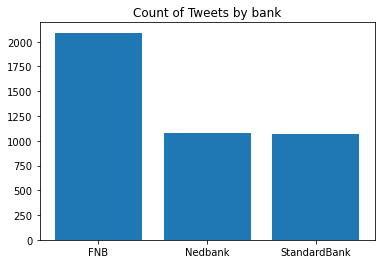

In [81]:
plt.bar(base_tweets["Bank"].value_counts().index, base_tweets["Bank"].value_counts() )
plt.title("Count of Tweets by bank")
plt.show()

### Cleaning tweet data 


In [82]:
def link_at_s_removal(text):  
    pat1 = r'@_?[A-Za-z0-9]+'  # @[A-Za-z0-9]+
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4))
    text = re.sub(combined_pat,"",text)
    return text

def clean_text(text): 
    text=link_at_s_removal(text)
    
    text = re.sub('[^A-Za-z\s]', '', text.lower())        #remove non-alphabet
    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in STOPWORDS
    ]
    return ' '.join(clean_text)

#### run tween cleaner

In [83]:
cleaned_list = []

for t in base_tweets["tweet"]:
    cleaned_list.append(clean_text(t))

In [84]:
##make a dataframe for sentiment analysis
clean_df = pd.DataFrame(cleaned_list,columns=['tweet'])
clean_df.head()

,tweet
0,regreting banking showed much love support eve...
1,right bank world low interests
2,
3,safety first
4,


In [85]:
#drop empty tweet
clean_df = clean_df [ ~(clean_df["tweet"] =="")]

## Sentiment analysis 

In [86]:
for index, row in clean_df.iterrows():
    tweet = clean_df.at[index, 'tweet']

    #run sentiment using TextBlob
    analysis = TextBlob(tweet)

    #set value to dataframe
    clean_df.at[index, 'polarity'] = analysis.sentiment[0]
    clean_df.at[index, 'subjectivity'] = analysis.sentiment[1]

    #Create Positive / negative column depending on polariity
    if analysis.sentiment[0]>0:

        clean_df.at[index, 'Sentiment'] = "Positive"
        #printmd('Positive', color="green")

    elif analysis.sentiment[0]<0:

        clean_df.at[index, 'Sentiment'] = "Negative"
    else:

        clean_df.at[index, 'Sentiment'] = "Neutral"

In [87]:
clean_df.to_csv("cleaned.csv")
clean_df.head()

,tweet,polarity,subjectivity,Sentiment
0,regreting banking showed much love support eve...,0.300000,0.366667,Positive
1,right bank world low interests,0.142857,0.417857,Positive
3,safety first,0.250000,0.333333,Positive
7,easy queues bank charges swiped card still cas...,0.433333,0.833333,Positive
8,took days placing order told dont stock even g...,-0.200000,0.566667,Negative


## Merge cleaned and original 

In [88]:
Final_df = pd.merge(clean_df, base_tweets, left_index=True, right_index=True)

In [89]:
Final_df = Final_df.rename(columns={"tweet_x": "cleaned_tweet", "tweet_y": "Base_tweet"})
Final_df.head(2)

,cleaned_tweet,polarity,subjectivity,Sentiment,date,username,Base_tweet,language,hashtags,retweet_id,reply_to,nlikes,search,Bank
0,regreting banking showed much love support eve...,0.300000,0.366667,Positive,2021-09-03 18:51:37,ThembaMnguni3,"Regreting why I am banking with @FNBSA , @Ned...",en,['movingtonedbank'],NaN,[],0,FNBSA,FNB
1,right bank world low interests,0.142857,0.417857,Positive,2021-09-03 18:39:14,MatsobaneJalk3,@FNBSA #loveFNB..@FNBSA..the right bank in the...,en,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",0,FNBSA,FNB


## Create rolling Mean / Expanding 

In [90]:
Final_df["date"] = pd.to_datetime(Final_df["date"])

#set index = date so as to create rolling mean 
Final_df = Final_df.sort_values('date').set_index('date')

In [126]:
#Create bank Dataframes 
Standard_df = Final_df[(Final_df.Bank=="StandardBank")]
FNB_df = Final_df[(Final_df.Bank=="FNB")]
Nedbank_df = Final_df[(Final_df.Bank=="Nedbank")]

#### Get rolling/ expanding mean 

In [130]:
# stop this warning as the chaining is fine
pd.options.mode.chained_assignment = None 

#Total
Final_df['mean'] = Final_df['polarity'].expanding().mean()
Final_df['rolling'] = Final_df['polarity'].rolling("1d").mean()

#Std Bank
Standard_df['mean'] = Standard_df['polarity'].expanding().mean()
Standard_df['rolling'] = Standard_df['polarity'].rolling("1d").mean()

#FNB
FNB_df['mean'] = FNB_df['polarity'].expanding().mean()
FNB_df['rolling'] = FNB_df['polarity'].rolling("1d").mean()

#Nebank
Nedbank_df['mean'] = Nedbank_df['polarity'].expanding().mean()
Nedbank_df['rolling'] = Nedbank_df['polarity'].rolling("1d").mean()

## Analysis and visualisation

In [135]:
# number of tweets
Final_df[["cleaned_tweet","Bank"]].groupby(["Bank"]).count().transpose()

Bank,FNB,Nedbank,StandardBank
cleaned_tweet,1416,1057,1023


In [134]:
# Overall sentiment 
Final_df[["polarity","Bank"]].groupby(["Bank"]).mean().transpose()

Bank,FNB,Nedbank,StandardBank
polarity,0.111837,0.093909,0.040997


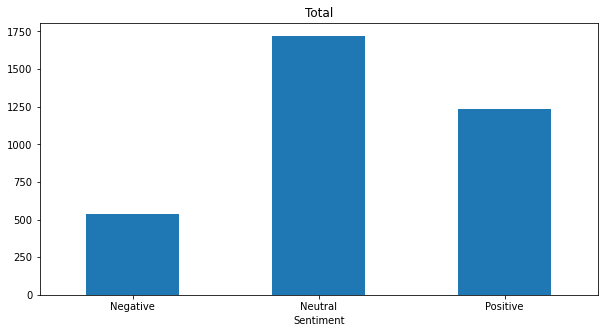

In [158]:
#set graph values
sentimentFinal = Final_df[["Bank","Sentiment"]].groupby('Sentiment').count()["Bank"]

plt.figure(figsize=(10,5))
fig.suptitle('Sentiment')

sentimentFinal.plot(kind='bar', title='Total',rot= 0)
plt.show()

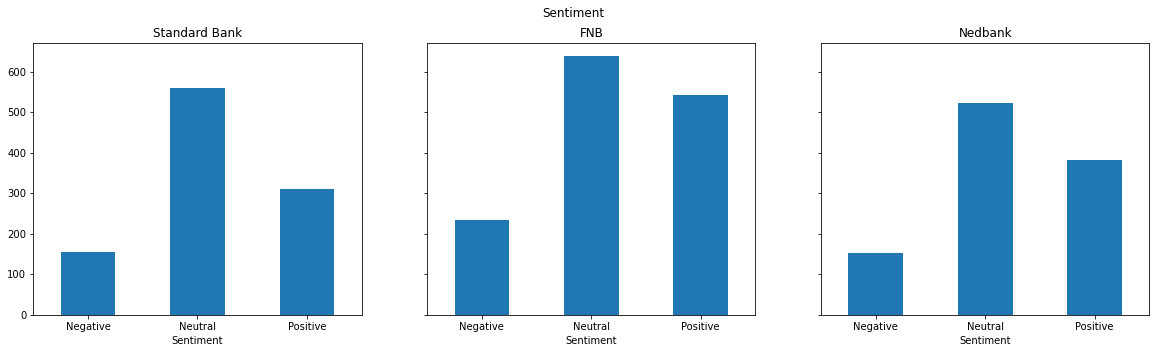

In [178]:
#set graph values
sentimentStd = Standard_df[["Bank","Sentiment"]].groupby('Sentiment').count()["Bank"]
sentimentFNB = FNB_df[["Bank","Sentiment"]].groupby('Sentiment').count()["Bank"]
sentimentNed = Nedbank_df[["Bank","Sentiment"]].groupby('Sentiment').count()["Bank"]

#create graphs
fig, axes = plt.subplots(1, 3,figsize=(20, 5),sharey=True)
fig.suptitle('Sentiment')

sentimentStd.plot(ax = axes[0], kind='bar', title='Standard Bank',rot= 0)
sentimentFNB.plot(ax = axes[1], kind='bar', title='FNB',rot= 0)
sentimentNed.plot(ax = axes[2], kind='bar', title='Nedbank',rot= 0)
plt.show()

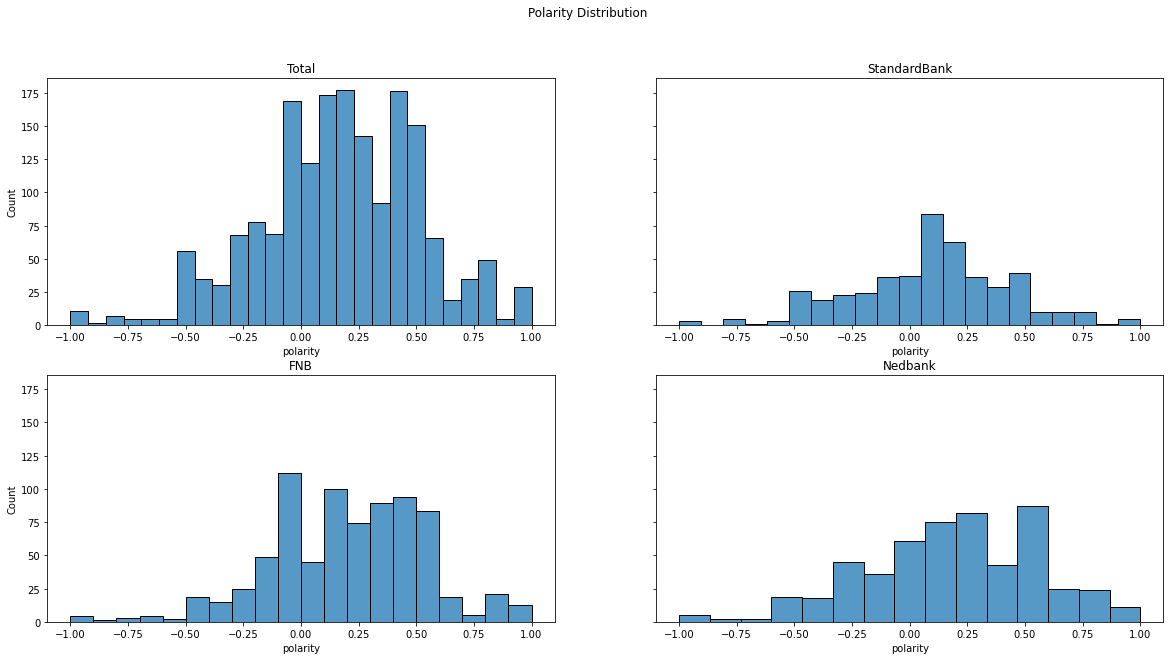

In [177]:
fig, axes = plt.subplots(2, 2,figsize=(20, 10),sharey=True)
fig.suptitle('Polarity Distribution')

# total
#remove the neutral values 
sns.histplot(ax=axes[0,0], data = Final_df['polarity'][~(Final_df['polarity']==0)])
axes[0,0].set_title("Total")

#StandardBank
sns.histplot(ax=axes[0,1], data= Standard_df['polarity'][~(Standard_df['polarity']==0)])
axes[0,1].set_title("StandardBank")

# FNB
sns.histplot(ax=axes[1,0], data = FNB_df['polarity'][~(FNB_df['polarity']==0)])
axes[1,0].set_title("FNB")

# Nedbank
sns.histplot(ax=axes[1,1], data = Nedbank_df['polarity'][~(Nedbank_df['polarity']==0)])
axes[1,1].set_title("Nedbank")

plt.show()

# Hashtag analysis 

In [108]:
#### Top 5 hastags 

In [179]:
import ast
from collections import Counter

#get all hashtags as list
def hashlist(df):
    hashlist = []
    for i in df['hashtags']:
        hashlist.extend(ast.literal_eval(i))
    return hashlist

#Create values
def Create_values(hashlist):
    labels, values = zip(*Counter(hashlist).most_common(5))
    indexes = np.arange(len(labels))
    return labels,indexes,values

t_labels,t_indexes,t_values = Create_values(hashlist(Final_df))
s_labels,s_indexes,s_values = Create_values(hashlist(Standard_df))
f_labels,f_indexes,f_values = Create_values(hashlist(FNB_df))

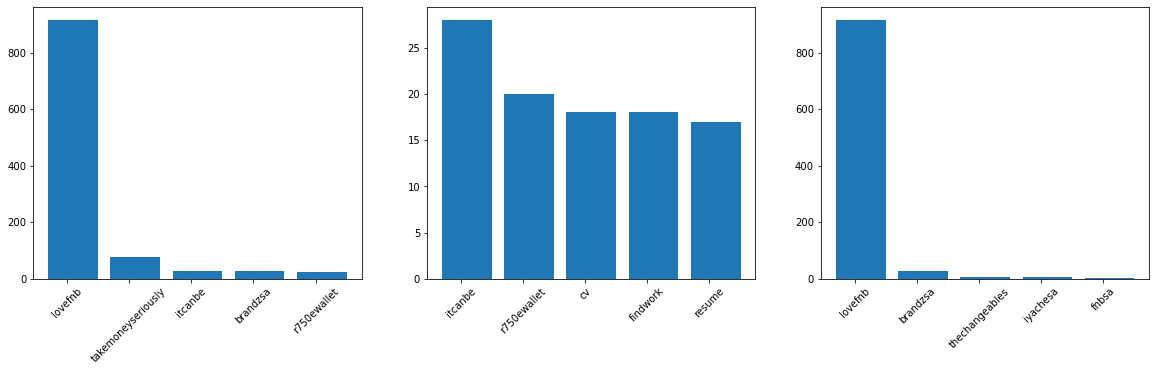

In [189]:
#plot graphs
fig, axes = plt.subplots(1, 3,figsize=(20, 5))

axes[0].bar(t_indexes, t_values )
axes[0].set_xticks(np.arange(len(t_labels))-0.1)
axes[0].set_xticklabels(t_labels, rotation= 45)

axes[1].bar(s_indexes, s_values )
axes[1].set_xticks(np.arange(len(s_labels))-0.1)
axes[1].set_xticklabels(s_labels, rotation= 45)

axes[2].bar(f_indexes, f_values )
axes[2].set_xticks(np.arange(len(f_labels))-0.1)
axes[2].set_xticklabels(f_labels, rotation= 45)
plt.show()

# Word Cloud

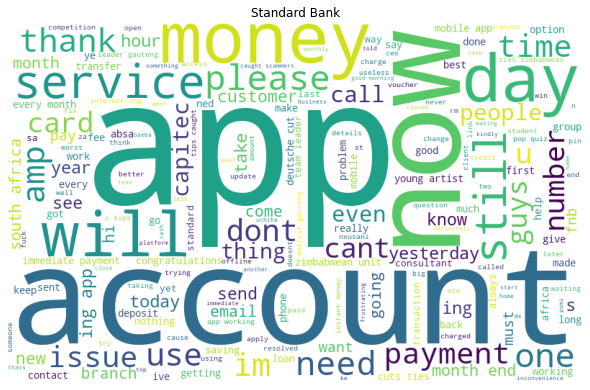

In [111]:
tweetString = " ".join(list(Standard_df["cleaned_tweet"])).lower()
tweetString1 = re.sub(r"standardbankza|standard bank|bank","",tweetString)     #remove bank name

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

plt.axis("off")
plt.title("Standard Bank")
plt.tight_layout(pad = 0) 
plt.show()

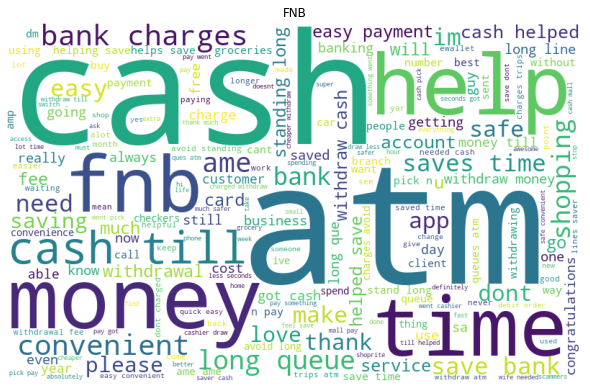

In [112]:
Fnb_string = " ".join(list(FNB_df["cleaned_tweet"])).lower()

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(Fnb_string)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("FNB")
plt.tight_layout(pad = 0) 
plt.show()

# Rolling plots

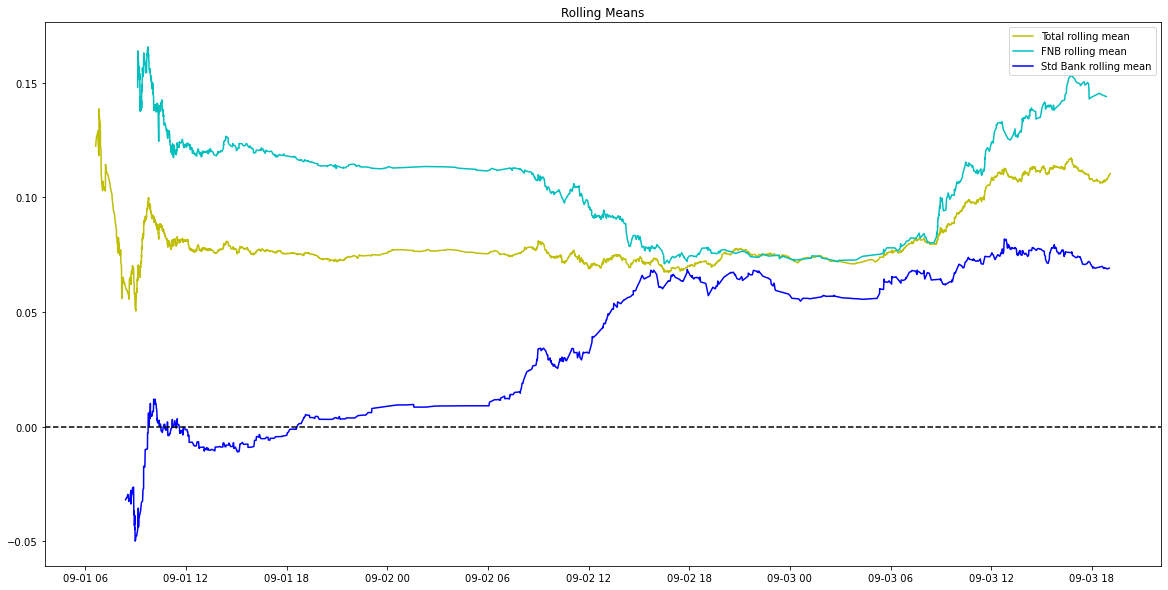

In [113]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.plot(Final_df.iloc[50:].index,Final_df['rolling'].iloc[50:], color='y', label='Total rolling mean')
ax.plot(FNB_df.iloc[50:].index,FNB_df.iloc[50:]['rolling'], color ='c', label='FNB rolling mean')
ax.plot(Standard_df.iloc[50:].index,Standard_df.iloc[50:]['rolling'], color ='b', label='Std Bank rolling mean')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.legend()
plt.title("Rolling Means")
plt.show()

In [114]:
Final_df.to_csv("Final.csv")

# To do 

1. Graph sentiment per day / month 

https://medium.com/analytics-vidhya/utilizing-twint-and-textblob-for-scraping-and-sentimenet-analysis-of-caucasianjamess-tweets-c1c548f52bbb

2. Check textblob - can I improve the sentiment score

3. Add Nedbank and Investec!! 

4. get customer satisfaction index (CSI) numbers - do they correlate to the Twitter sentiment 

## Project 2: 
do outages affect sentiment 
get outages overlap to rolling mean